In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from collections import Counter


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:

train = pd.read_csv('Train.csv')
train

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,...,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,Medium
2,ID_TY93LV,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Low
3,ID_9OP2C8,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,...,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,ID_D7NC2D,lesotho,31.0,Yes,No,No,Don't know,Don't know,2000.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Have now,Never had,Medium
9614,ID_NT06RL,malawi,64.0,Don’t know or N/A,Don’t know or N/A,Yes,No,No,10000000.0,5000000.0,...,Never had,Have now,Yes,NaN,NaN,NaN,No,NaN,NaN,High
9615,ID_4TVWA3,zimbabwe,43.0,Yes,No,No,Yes,No,450.0,NaN,...,NaN,NaN,No,8.0,Have now,Have now,NaN,NaN,NaN,Medium
9616,ID_3U3S2Z,zimbabwe,38.0,Yes,Yes,No,No,Yes,2000.0,NaN,...,NaN,NaN,No,0.0,Never had,Never had,NaN,NaN,NaN,Low


In [5]:
test = pd.read_csv('Test.csv')
test

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,ID_5EGLKX,zimbabwe,50.0,No,No,No,No,Yes,100.0,3600.0,...,NaN,NaN,NaN,No,8.0,Never had,Never had,NaN,NaN,NaN
1,ID_4AI7RE,lesotho,36.0,Yes,Yes,No,Yes,Yes,900.0,400.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
2,ID_V9OB3M,lesotho,25.0,Don’t know or N/A,No,No,Don't know,Don't know,5250.0,350.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,No,Never had,Used to have but don't have now
3,ID_6OI9DI,malawi,25.0,Don’t know or N/A,Yes,No,No,Yes,485000.0,10000.0,...,Never had,Never had,Never had,Yes,NaN,NaN,NaN,Yes,Have now,Never had
4,ID_H2TN8B,lesotho,47.0,No,Yes,No,Don't know,Don't know,97.0,500.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,ID_FX7XJZ,eswatini,29.0,Yes,Yes,No,No,Yes,600.0,1700.0,...,Never had,Never had,Never had,NaN,11.0,Never had,Never had,NaN,Never had,Never had
2401,ID_XAL1LX,malawi,20.0,Don’t know or N/A,Don’t know or N/A,No,Don't know,Don't know,30000.0,20000.0,...,Never had,Never had,Never had,No,4.0,NaN,NaN,Yes,NaN,NaN
2402,ID_UHBP0F,zimbabwe,26.0,Yes,Yes,No,Yes,Yes,3888.0,NaN,...,NaN,NaN,NaN,No,0.0,Have now,Have now,NaN,NaN,NaN
2403,ID_GKIKR2,eswatini,63.0,No,No,Yes,Yes,Yes,3500.0,1700.0,...,Never had,Never had,Never had,NaN,4.0,Never had,Have now,NaN,Never had,Never had


In [6]:
variable_definitions = pd.read_csv('VariableDefinitions.csv')
variable_definitions

,VARIABLE_NAME,VARIABLE_DESCRIPTION
0,ID,Unique identifier for each business record
1,country,Country where the business is located (Eswatin...
2,owner_age,Age of the business owner in years
3,attitude_stable_business_environment,Owner attitude: Country will have a stable bus...
4,attitude_worried_shutdown,Owner attitude: Worried that the business will...
5,compliance_income_tax,Business complies with or acts in accordance w...
6,perception_insurance_doesnt_cover_losses,Owner perception: Insurance does not cover the...
7,perception_cannot_afford_insurance,Owner perception: Cannot afford insurance paym...
8,personal_income,Total monthly personal income of the owner bef...
9,business_expenses,Approximate monthly or annual expenses of the ...


In [7]:
# ========================================
# 1. DATASET OVERVIEW
# ========================================

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nTrain Dataset Shape: {train.shape}")
print(f"Test Dataset Shape: {train.shape}")
print(f"\nNumber of Features in Train: {train.shape[1]}")
print(f"Number of Features in Test: {train.shape[1]}")

DATASET OVERVIEW

Train Dataset Shape: (9618, 39)
Test Dataset Shape: (9618, 39)

Number of Features in Train: 39
Number of Features in Test: 39



TARGET VARIABLE ANALYSIS

Target Distribution:
Target
High       470
Low       6280
Medium    2868
Name: count, dtype: int64

Target Proportions:
Target
High      0.048867
Low       0.652942
Medium    0.298191
Name: proportion, dtype: float64


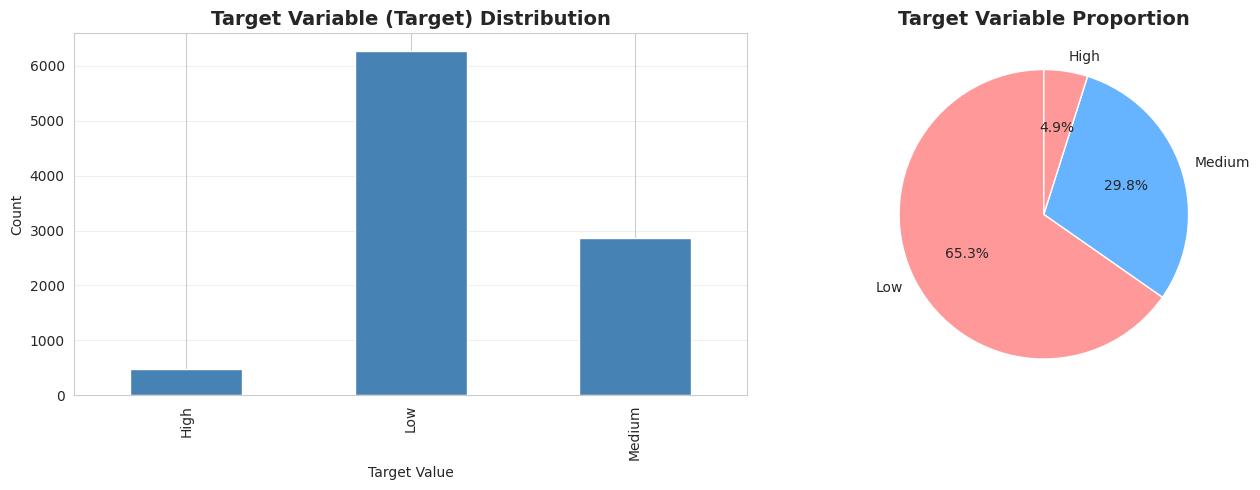


⚠ Class imbalance detected! Ratio: 13.36:1


In [8]:
# ========================================
# 2. TARGET VARIABLE ANALYSIS (Target)
# ========================================

print("\n" + "=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

if 'Target' in train.columns:
    print("\nTarget Distribution:")
    print(train['Target'].value_counts().sort_index())
    print(f"\nTarget Proportions:")
    print(train['Target'].value_counts(normalize=True).sort_index())


    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Count plot
    train['Target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Target Variable (Target) Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Target Value')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)

    # Pie chart
    target_counts = train['Target'].value_counts()
    axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['#ff9999', '#66b3ff'])
    axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Check for class imbalance
    class_ratio = train['Target'].value_counts().max() / train['Target'].value_counts().min()
    if class_ratio > 1.5:
        print(f"\n⚠ Class imbalance detected! Ratio: {class_ratio:.2f}:1")
    else:
        print(f"\n✓ Classes are relatively balanced. Ratio: {class_ratio:.2f}:1")

In [9]:
# ========================================
# 3. BASIC INFORMATION
# ========================================

print("\n" + "=" * 60)
print("BASIC DATASET INFORMATION")
print("=" * 60)

print("\n--- TRAIN SET INFO ---")
print(train.info())

print("\n--- TEST SET INFO ---")
print(train.info())


BASIC DATASET INFORMATION

--- TRAIN SET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-nu


MISSING VALUES ANALYSIS

TRAIN SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                            uses_informal_lender           4489   46.672905
                                     uses_friends_family_savings           4488   46.662508
                                      motivation_make_more_money           4291   44.614265
                                               funeral_insurance           4188   43.543356
                                               medical_insurance           4188   43.543356
                                             business_age_months           4111   42.742774
                                         future_risk_theft_stock           4100   42.628405
                                                  has_debit_card           4003   41.619879
                                            has_internet_banking           4003   41.619879
             

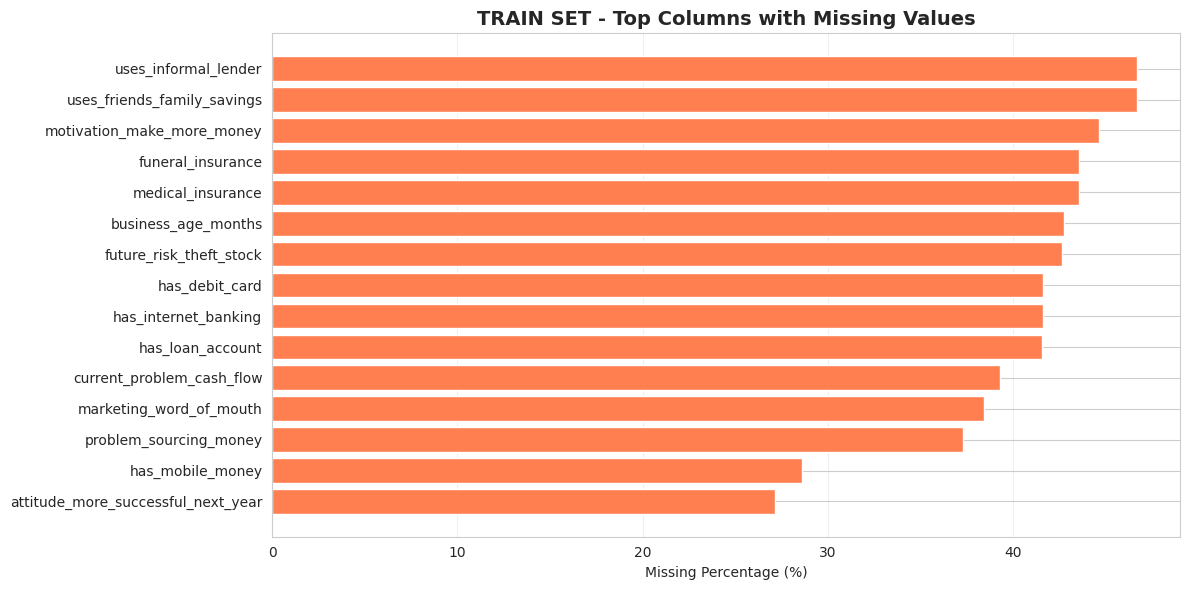


TEST SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                     uses_friends_family_savings           1131   47.027027
                                            uses_informal_lender           1131   47.027027
                                      motivation_make_more_money           1084   45.072765
                                               funeral_insurance           1042   43.326403
                                               medical_insurance           1042   43.326403
                                             business_age_months           1033   42.952183
                                         future_risk_theft_stock           1017   42.286902
                                                  has_debit_card            992   41.247401
                                                has_loan_account            992   41.247401
                                       

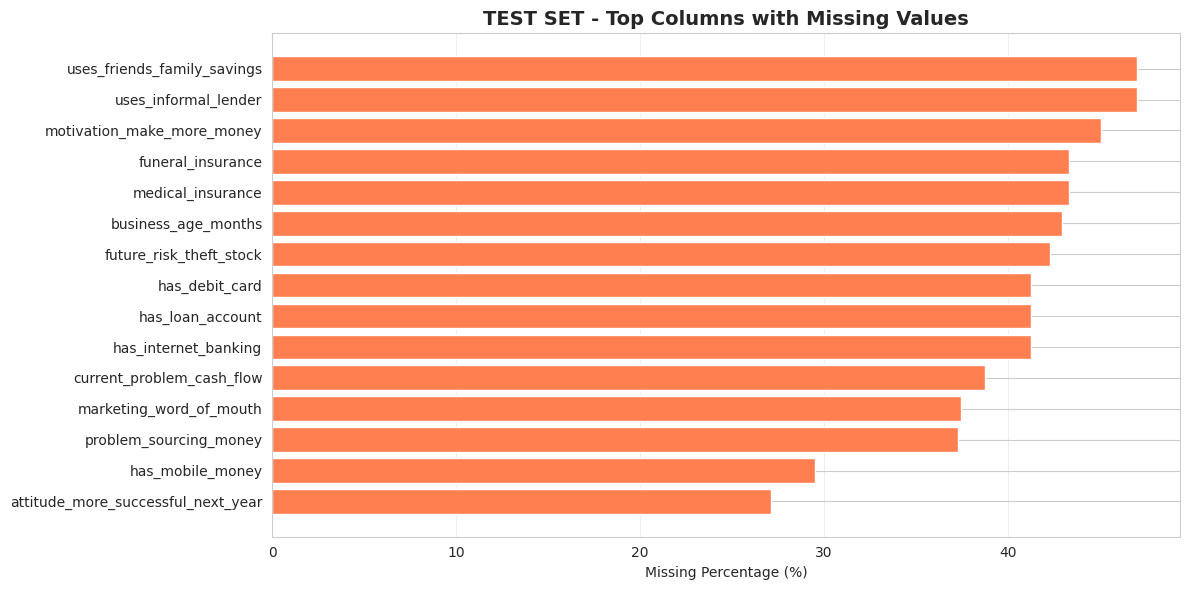

In [10]:
# ========================================
# 4. MISSING VALUES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

def analyze_missing(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Percentage': missing_pct.values
    }).query('Missing_Count > 0').sort_values('Percentage', ascending=False)

    print(f"\n{name} - Columns with Missing Values:")
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))

        # Visualize top missing columns
        if len(missing_df) > 0:
            top_missing = missing_df.head(15)
            plt.figure(figsize=(12, 6))
            plt.barh(top_missing['Column'], top_missing['Percentage'], color='coral')
            plt.xlabel('Missing Percentage (%)')
            plt.title(f'{name} - Top Columns with Missing Values', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found!")

    return missing_df

train_missing = analyze_missing(train, "TRAIN SET")
test_missing = analyze_missing(test, "TEST SET")


NUMERICAL FEATURES ANALYSIS

Numerical Features (6):
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months']

Statistical Summary:
         owner_age  personal_income  business_expenses  business_turnover  \
count  9618.000000     9.509000e+03       9.389000e+03       9.402000e+03   
mean     41.705344     2.627345e+05       4.583838e+05       1.348210e+06   
std      13.314010     2.566268e+06       6.184746e+06       8.804741e+06   
min      18.000000     0.000000e+00       0.000000e+00       0.000000e+00   
25%      32.000000     3.000000e+02       7.000000e+02       1.500000e+03   
50%      40.000000     2.000000e+03       3.000000e+03       6.000000e+03   
75%      50.000000     2.500000e+04       2.500000e+04       5.000000e+04   
max     103.000000     1.500000e+08       5.000000e+08       4.200000e+08   

       business_age_years  business_age_months  
count         9366.000000          5507.000000  
mean        

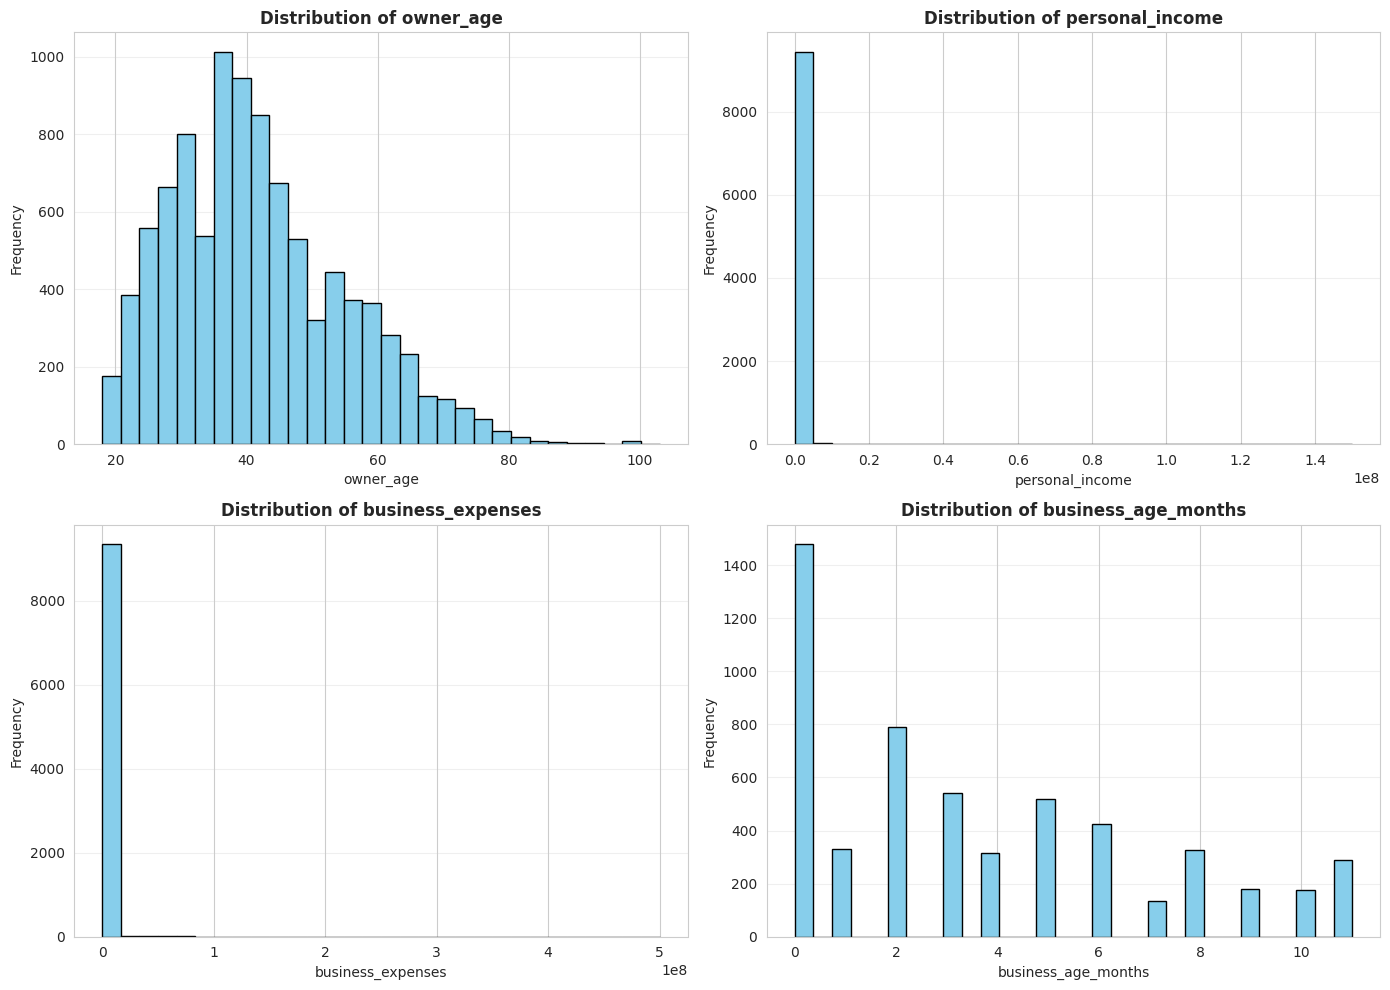

In [11]:
# ========================================
# 5. NUMERICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)

# Statistical summary
print("\nStatistical Summary:")
print(train[numerical_cols].describe())

# Visualize distributions of key numerical features
key_numerical = ['owner_age', 'personal_income', 'business_expenses', 'business_age_months']
available_numerical = [col for col in key_numerical if col in train.columns]

if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()

    for idx, col in enumerate(available_numerical[:4]):
        train[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [12]:
# ========================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Cardinality analysis
print("\nCardinality (Unique Values) for Categorical Features:")
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [train[col].nunique() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))


CATEGORICAL FEATURES ANALYSIS

Categorical Features (32):
['country', 'attitude_stable_business_environment', 'attitude_worried_shutdown', 'compliance_income_tax', 'perception_insurance_doesnt_cover_losses', 'perception_cannot_afford_insurance', 'motor_vehicle_insurance', 'has_mobile_money', 'current_problem_cash_flow', 'has_cellphone', 'owner_sex', 'offers_credit_to_customers', 'attitude_satisfied_with_achievement', 'has_credit_card', 'keeps_financial_records', 'perception_insurance_companies_dont_insure_businesses_like_yours', 'perception_insurance_important', 'has_insurance', 'covid_essential_service', 'attitude_more_successful_next_year', 'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account', 'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock', 'medical_insurance', 'funeral_insurance', 'motivation_make_more_money', 'uses_friends_family_savings', 'uses_informal_lender', 'Target']

Cardinality (Unique Values) for Categorical Features:
              


COUNTRY DISTRIBUTION

Train Set Country Distribution:
country
eswatini    2674
zimbabwe    2612
malawi      2388
lesotho     1944
Name: count, dtype: int64

Test Set Country Distribution:
country
eswatini    669
zimbabwe    653
malawi      597
lesotho     486
Name: count, dtype: int64


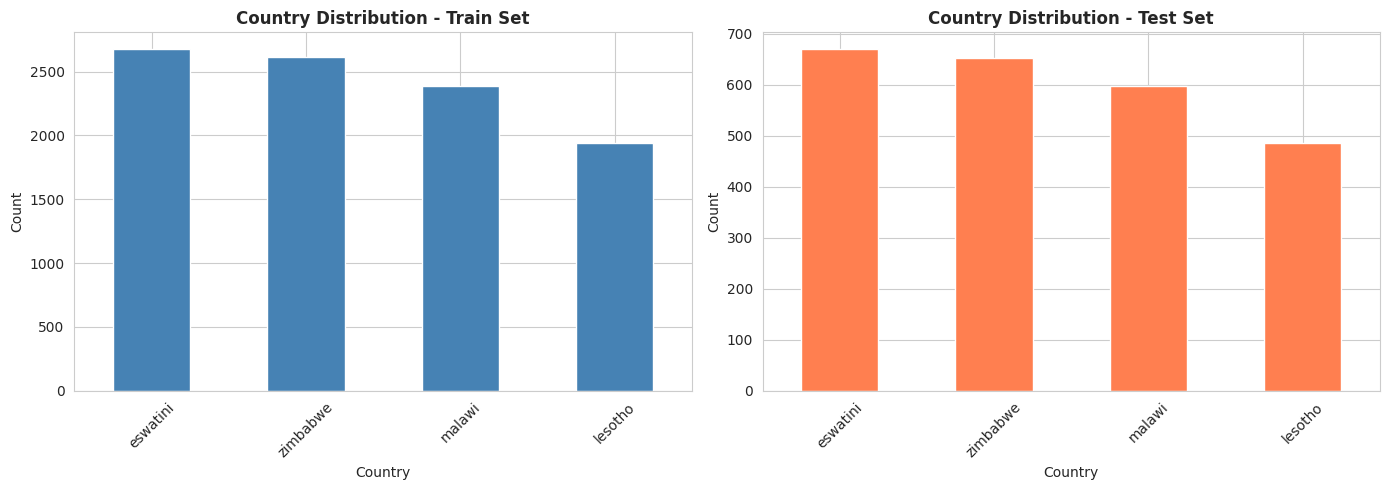

In [13]:
# ========================================
# 7. COUNTRY DISTRIBUTION
# ========================================

print("\n" + "=" * 60)
print("COUNTRY DISTRIBUTION")
print("=" * 60)

if 'country' in train.columns:
    print("\nTrain Set Country Distribution:")
    print(train['country'].value_counts())

    print("\nTest Set Country Distribution:")
    print(test['country'].value_counts())

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    train['country'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Country Distribution - Train Set', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    test['country'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Country Distribution - Test Set', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Country')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [14]:
# ========================================
# 8. BINARY/CATEGORICAL FEATURE PATTERNS
# ========================================

print("\n" + "=" * 60)         #train
print("BINARY & CATEGORICAL PATTERNS")
print("=" * 60)

# Analyze Yes/No columns
print("\nTRAIN")
print("-" * 40)

yes_no_cols = [col for col in categorical_cols if
               train[col].dropna().isin(['Yes', 'No', "Don't know or N/A"]).any()]

print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
for col in yes_no_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(train[col].value_counts())


BINARY & CATEGORICAL PATTERNS

TRAIN
----------------------------------------

Yes/No Type Columns (19):

attitude_stable_business_environment:
attitude_stable_business_environment
Yes                  5820
No                   2451
Don’t know or N/A    1345
Name: count, dtype: int64

attitude_worried_shutdown:
attitude_worried_shutdown
No                   5804
Yes                  3575
Don’t know or N/A     237
Name: count, dtype: int64

compliance_income_tax:
compliance_income_tax
No            8010
Yes           1252
Don’t know     341
Refused         11
Name: count, dtype: int64

perception_insurance_doesnt_cover_losses:
perception_insurance_doesnt_cover_losses
No            4486
Yes           2604
Don't know    2523
Name: count, dtype: int64

perception_cannot_afford_insurance:
perception_cannot_afford_insurance
Yes           6056
No            2093
Don't know    1464
Name: count, dtype: int64


In [15]:
# Analyze Yes/No columns
# print("TEST")
# print("-" * 40)

# yes_no_cols = [col for col in categorical_cols if
#                test[col].dropna().isin(['Yes', 'No', "Don't know or N/A"]).any()]

# print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
# for col in yes_no_cols[:5]:  # Show first 5
#     print(f"\n{col}:")
#     print(test[col].value_counts())

In [16]:
#Analyze Have now / Never had columns
print("TRAIN")
print("-" * 40)

have_never_had_cols = [col for col in categorical_cols if
               train[col].dropna().isin(['Never had', 'Have now']).any()]

print(f"\n Have now / Never had Type Columns ({len(have_never_had_cols)}):")
for col in have_never_had_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(train[col].value_counts())

TRAIN
----------------------------------------

 Have now / Never had Type Columns (10):

motor_vehicle_insurance:
motor_vehicle_insurance
Never had                          6994
Have now                            297
Used to have but don’t have now      47
Don't know                           36
Name: count, dtype: int64

has_mobile_money:
has_mobile_money
Have now                           4876
Never had                          1842
Used to have but don't have now      82
Used to have but don’t have now      61
Don't know                            6
Name: count, dtype: int64

has_credit_card:
has_credit_card
Never had                          7246
Have now                            281
Used to have but don't have now      74
Don't know                           53
Used to have but don’t have now      17
Name: count, dtype: int64

has_loan_account:
has_loan_account
Never had                          4501
Used to have but don't have now     477
Have now                            4

In [17]:
#Analyze Have now / Never had columns
# print("TEST")
# print("-" * 40)

# have_never_had_cols = [col for col in categorical_cols if
#                test[col].dropna().isin(['Never had', 'Have now']).any()]

# print(f"\n Have now / Never had Type Columns ({len(have_never_had_cols)}):")
# for col in have_never_had_cols[:5]:  # Show first 5
#     print(f"\n{col}:")
#     print(test[col].value_counts())

In [18]:
# ========================================
# 9. FEATURE RELATIONSHIPS WITH TARGET
# ========================================

if 'Target' in train.columns:
    print("\n" + "=" * 0)
    print("FEATURE RELATIONSHIPS WITH TARGET")
    print("=" * 40)

    # Numerical features vs target
    print("\nKey Numerical Features by Target:")
    if available_numerical:
        for col in available_numerical[:3]:  # Top 3
            print(f"\n{col} by Target:")
            grouped_stats = train.groupby('Target')[col].agg(['mean', 'median', 'std', 'count'])
            print(grouped_stats)

    # Categorical features vs target
    print("\nKey Categorical Features by Target:")
    key_cat = ['country', 'compliance_income_tax', 'medical_insurance']
    for col in key_cat:
        if col in train.columns:
            print(f"\n{col} distribution by Target:")
            ct = pd.crosstab(train[col], train['Target'], normalize='index') * 100
            print(ct.round(2))



FEATURE RELATIONSHIPS WITH TARGET

Key Numerical Features by Target:

owner_age by Target:
             mean  median        std  count
Target                                     
High    44.610638    42.0  11.881589    470
Low     40.732962    39.0  13.333695   6280
Medium  43.358438    42.0  13.264731   2868

personal_income by Target:
                 mean  median           std  count
Target                                            
High    882802.239224  5000.0  4.715191e+06    464
Low     254094.823039  2000.0  2.546815e+06   6209
Medium  180199.970205  1500.0  2.045196e+06   2836

business_expenses by Target:
                mean   median           std  count
Target                                            
High    1.062801e+06  10100.0  8.584024e+06    464
Low     4.855686e+05   3000.0  6.866861e+06   6137
Medium  2.979526e+05   2000.0  3.564138e+06   2788

Key Categorical Features by Target:

country distribution by Target:
Target     High    Low  Medium
country           

In [19]:
# ========================================
# 10. DATA QUALITY CHECKS
# ========================================

print("\n" + "=" * 40)
print("DATA QUALITY CHECKS")
print("=" * 40)

# Check for duplicate IDs
print(f"\nDuplicate IDs in Train: {train['ID'].duplicated().sum()}")
print(f"Duplicate IDs in Test: {test['ID'].duplicated().sum()}")

# Check for ID overlap
id_overlap = set(train['ID']).intersection(set(test['ID']))
print(f"Overlapping IDs between Train and Test: {len(id_overlap)}")

# Check feature consistency
train_cols = set(train.columns) - {'FHI'}
test_cols = set(test.columns)
missing_in_test = train_cols - test_cols
extra_in_test = test_cols - train_cols

if missing_in_test:
    print(f"\n⚠ Features in Train but not in Test: {missing_in_test}")
if extra_in_test:
    print(f"\n⚠ Features in Test but not in Train: {extra_in_test}")
if not missing_in_test and not extra_in_test:
    print("\n✓ Feature sets are consistent (except target variable)")


DATA QUALITY CHECKS

Duplicate IDs in Train: 0
Duplicate IDs in Test: 0
Overlapping IDs between Train and Test: 0

⚠ Features in Train but not in Test: {'Target'}


In [20]:
# ========================================
# 11. KEY INSIGHTS SUMMARY
# ========================================

print("\n" + "=" * 40)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 40)

print("\n📊 EDA SUMMARY:")
print(f"• Total training samples: {len(train):,}")
print(f"• Total test samples: {len(test):,}")
print(f"• Number of features: {len(categorical_cols) + len(numerical_cols)}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")

if len(train_missing) > 0:
    print(f"\n⚠ Missing Data:")
    print(f"• Features with missing values: {len(train_missing)}")
    print(f"• Highest missing percentage: {train_missing['Percentage'].max():.1f}%")

print("\n💡 NEXT STEPS:")
print("1. Handle missing values (imputation or feature engineering)")
print("2. Encode categorical variables (Label/One-Hot encoding)")
print("3. Scale numerical features if needed")
print("4. Consider feature engineering based on domain knowledge")
print("5. Handle class imbalance if present")
print("6. Train baseline models and iterate")

print("\n" + "=" * 40)
print("EDA COMPLETE!")
print("=" * 40)


KEY INSIGHTS & RECOMMENDATIONS

📊 EDA SUMMARY:
• Total training samples: 9,618
• Total test samples: 2,405
• Number of features: 38
• Numerical features: 6
• Categorical features: 32

⚠ Missing Data:
• Features with missing values: 35
• Highest missing percentage: 46.7%

💡 NEXT STEPS:
1. Handle missing values (imputation or feature engineering)
2. Encode categorical variables (Label/One-Hot encoding)
3. Scale numerical features if needed
4. Consider feature engineering based on domain knowledge
5. Handle class imbalance if present
6. Train baseline models and iterate

EDA COMPLETE!


In [21]:
print("\n" + "=" * 60)
print("1. Handling missing values (imputation or feature engineering)")
print("=" * 60)

print("\nFixing spelling")
print("-" * 40)

train_df = train.replace({
    "Don?t know / doesn?t apply": "Don't know",
    "Don't know or N/A": "Don't know",
    "Don't Know": "Don't know",
    "Don’t know or N/A": "Don't know",
    " Do not know / N\u200e/A": "Don't know",
    "Don’t know (Do not show)": "Don't know",
    "Refused": "No",
    "Used to have but don’t have now": "Used to have but don’t have now",
    "0": "No"
})
train_df


1. Handling missing values (imputation or feature engineering)

Fixing spelling
----------------------------------------


,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,...,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,Medium
2,ID_TY93LV,malawi,34.0,Don't know,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Low
3,ID_9OP2C8,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,...,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,ID_D7NC2D,lesotho,31.0,Yes,No,No,Don't know,Don't know,2000.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Have now,Never had,Medium
9614,ID_NT06RL,malawi,64.0,Don't know,Don't know,Yes,No,No,10000000.0,5000000.0,...,Never had,Have now,Yes,NaN,NaN,NaN,No,NaN,NaN,High
9615,ID_4TVWA3,zimbabwe,43.0,Yes,No,No,Yes,No,450.0,NaN,...,NaN,NaN,No,8.0,Have now,Have now,NaN,NaN,NaN,Medium
9616,ID_3U3S2Z,zimbabwe,38.0,Yes,Yes,No,No,Yes,2000.0,NaN,...,NaN,NaN,No,0.0,Never had,Never had,NaN,NaN,NaN,Low


In [22]:
test_df = test.replace({
    "Don?t know / doesn?t apply": "Don't know",
    "Don't know or N/A": "Don't know",
    "Don't Know": "Don't know",
    "Don’t know or N/A": "Don't know",
    " Do not know / N\u200e/A": "Don't know",
    "Don’t know (Do not show)": "Don't know",
    "Refused": "No",
    "Used to have but don’t have now": "Used to have but don’t have now",
    "0": "No"
})
test_df.head(5)

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,ID_5EGLKX,zimbabwe,50.0,No,No,No,No,Yes,100.0,3600.0,...,NaN,NaN,NaN,No,8.0,Never had,Never had,NaN,NaN,NaN
1,ID_4AI7RE,lesotho,36.0,Yes,Yes,No,Yes,Yes,900.0,400.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
2,ID_V9OB3M,lesotho,25.0,Don't know,No,No,Don't know,Don't know,5250.0,350.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,No,Never had,Used to have but don't have now
3,ID_6OI9DI,malawi,25.0,Don't know,Yes,No,No,Yes,485000.0,10000.0,...,Never had,Never had,Never had,Yes,NaN,NaN,NaN,Yes,Have now,Never had
4,ID_H2TN8B,lesotho,47.0,No,Yes,No,Don't know,Don't know,97.0,500.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now


In [23]:
print("Handling Nulls in TRAIN")
print("-" * 40)

# List of categorical columns
categorical_columns = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records'
]

# List of numeric columns
numeric_columns = [
    'business_age_months',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'owner_age'
]

# Function to fill categorical columns
def fill_categorical_by_country_mode(train_df, column):

    # Fill NaNs by country mode
    train_df[column] = train_df.groupby('country')[column].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Fill any remaining NaNs with global mode
    global_mode = train_df[column].mode().iloc[0] if not train_df[column].mode().empty else np.nan
    train_df[column] = train_df[column].fillna(global_mode)
    return train_df

# Fill all categorical columns
for col in categorical_columns:
    fill_categorical_by_country_mode(train_df, col)

# Function to fill numeric columns
def fill_numeric_by_country_median(train_df, column):

    # Fill NaNs by country median
    train_df[column] = train_df.groupby('country')[column].transform(lambda x: x.fillna(x.median()))

    # Fill remaining NaNs with global median
    train_df[column] = train_df[column].fillna(train_df[column].median())
    return train_df

# Fill all numeric columns
for col in numeric_columns:
    fill_numeric_by_country_median(train_df, col)

# Final check: print number of NaNs remaining per column
print("Remaining NaNs in categorical columns:")
print(train_df[categorical_columns].isnull().sum())

print("\nRemaining NaNs in numeric columns:")
print(train_df[numeric_columns].isnull().sum())

# Optional: Check NaNs per country for any column (example: business_age_months)
nan_by_country = train_df.groupby('country')['business_age_months'].apply(lambda x: x.isnull().sum())
print("\nNaNs per country in 'business_age_months':")
print(nan_by_country)

Handling Nulls in TRAIN
----------------------------------------
Remaining NaNs in categorical columns:
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
current_problem_cash_flow                                           0
attitude_satisfied_with_achievement                                 0
perception_insurance_important                                      0
covid_essential_service                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                 

/tmp/ipython-input-148/839534727.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
/tmp/ipython-input-148/839534727.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
/tmp/ipython-input-148/839534727.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

In [24]:
print("Handling Nulls in TEST")
print("-" * 40)

# List of categorical columns
categorical_columns = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records'
]

# List of numeric columns
numeric_columns = [
    'business_age_months',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'owner_age'
]

# Function to fill categorical columns
def fill_categorical_by_country_mode(test_df, column):

    # Fill NaNs by country mode
    test_df[column] = test_df.groupby('country')[column].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Fill any remaining NaNs with global mode
    global_mode = train_df[column].mode().iloc[0] if not test_df[column].mode().empty else np.nan
    test_df[column] = test_df[column].fillna(global_mode)
    return test_df

# Fill all categorical columns
for col in categorical_columns:
    fill_categorical_by_country_mode(test_df, col)

# Function to fill numeric columns
def fill_numeric_by_country_median(test_df, column):

    # Fill NaNs by country median
    test_df[column] = test_df.groupby('country')[column].transform(lambda x: x.fillna(x.median()))

    # Fill remaining NaNs with global median
    test_df[column] = test_df[column].fillna(test_df[column].median())
    return test_df

# Fill all numeric columns
for col in numeric_columns:
    fill_numeric_by_country_median(test_df, col)

# Final check: print number of NaNs remaining per column
print("Remaining NaNs in categorical columns:")
print(test_df[categorical_columns].isnull().sum())

print("\nRemaining NaNs in numeric columns:")
print(test_df[numeric_columns].isnull().sum())

# Optional: Check NaNs per country for any column (example: business_age_months)
nan_by_country = test_df.groupby('country')['business_age_months'].apply(lambda x: x.isnull().sum())
print("\nNaNs per country in 'business_age_months':")
print(nan_by_country)

Handling Nulls in TEST
----------------------------------------
Remaining NaNs in categorical columns:
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
current_problem_cash_flow                                           0
attitude_satisfied_with_achievement                                 0
perception_insurance_important                                      0
covid_essential_service                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                  

/tmp/ipython-input-148/395722219.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
/tmp/ipython-input-148/395722219.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
/tmp/ipython-input-148/395722219.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

In [25]:
print("Fixing data types in TRAIN")
print("-" * 40)

# Convert from float to int
train_df['owner_age'] = train_df['owner_age'].astype(int)
train_df['business_age_years'] = train_df['business_age_years'].astype(int)
train_df['business_age_months'] = train_df['business_age_months'].astype(int)
train_df

Fixing data types in TRAIN
----------------------------------------


,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,Yes,6,Never had,Used to have but don’t have now,Yes,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39,No,Yes,Yes,No,Yes,150.0,1200.0,...,Never had,Never had,No,3,Never had,Never had,Yes,Never had,Never had,Medium
2,ID_TY93LV,malawi,34,Don't know,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,5,Never had,Never had,Yes,Never had,Never had,Low
3,ID_9OP2C8,malawi,28,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,5,Never had,Never had,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43,Yes,No,No,Yes,Yes,50.0,2400.0,...,Never had,Never had,No,0,Never had,Never had,Yes,Never had,Never had,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,ID_D7NC2D,lesotho,31,Yes,No,No,Don't know,Don't know,2000.0,800.0,...,Used to have but don't have now,Have now,Yes,5,Never had,Never had,No,Have now,Never had,Medium
9614,ID_NT06RL,malawi,64,Don't know,Don't know,Yes,No,No,10000000.0,5000000.0,...,Never had,Have now,Yes,5,Never had,Never had,No,Never had,Never had,High
9615,ID_4TVWA3,zimbabwe,43,Yes,No,No,Yes,No,450.0,1200.0,...,Never had,Never had,No,8,Have now,Have now,Yes,Never had,Never had,Medium
9616,ID_3U3S2Z,zimbabwe,38,Yes,Yes,No,No,Yes,2000.0,1200.0,...,Never had,Never had,No,0,Never had,Never had,Yes,Never had,Never had,Low


In [26]:
print("Fixing data types in TEST")
print("-" * 40)

# Convert from float to int
test_df['owner_age'] = test_df['owner_age'].astype(int)
test_df['business_age_years'] = test_df['business_age_years'].astype(int)
test_df['business_age_months'] = test_df['business_age_months'].astype(int)
test_df

Fixing data types in TEST
----------------------------------------


,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,ID_5EGLKX,zimbabwe,50,No,No,No,No,Yes,100.0,3600.0,...,Never had,Never had,Never had,No,8,Never had,Never had,Yes,Never had,Never had
1,ID_4AI7RE,lesotho,36,Yes,Yes,No,Yes,Yes,900.0,400.0,...,Used to have but don't have now,Used to have but don't have now,Have now,Yes,4,Never had,Never had,Yes,Used to have but don't have now,Used to have but don't have now
2,ID_V9OB3M,lesotho,25,Don't know,No,No,Don't know,Don't know,5250.0,350.0,...,Used to have but don't have now,Have now,Have now,Yes,4,Never had,Never had,No,Never had,Used to have but don't have now
3,ID_6OI9DI,malawi,25,Don't know,Yes,No,No,Yes,485000.0,10000.0,...,Never had,Never had,Never had,Yes,4,Never had,Never had,Yes,Have now,Never had
4,ID_H2TN8B,lesotho,47,No,Yes,No,Don't know,Don't know,97.0,500.0,...,Used to have but don't have now,Have now,Have now,Yes,4,Never had,Never had,Yes,Used to have but don't have now,Used to have but don't have now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,ID_FX7XJZ,eswatini,29,Yes,Yes,No,No,Yes,600.0,1700.0,...,Never had,Never had,Never had,Yes,11,Never had,Never had,Yes,Never had,Never had
2401,ID_XAL1LX,malawi,20,Don't know,Don't know,No,Don't know,Don't know,30000.0,20000.0,...,Never had,Never had,Never had,No,4,Never had,Never had,Yes,Never had,Never had
2402,ID_UHBP0F,zimbabwe,26,Yes,Yes,No,Yes,Yes,3888.0,1200.0,...,Never had,Never had,Never had,No,0,Have now,Have now,Yes,Never had,Never had
2403,ID_GKIKR2,eswatini,63,No,No,Yes,Yes,Yes,3500.0,1700.0,...,Never had,Never had,Never had,Yes,4,Never had,Have now,Yes,Never had,Never had


In [27]:
x = train_df.drop(['ID','owner_sex'], axis=1)
x

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,eswatini,63,Yes,No,No,No,Yes,3000.0,6000.0,7000.0,...,Never had,Never had,Yes,6,Never had,Used to have but don’t have now,Yes,Never had,Never had,Low
1,zimbabwe,39,No,Yes,Yes,No,Yes,150.0,1200.0,3000.0,...,Never had,Never had,No,3,Never had,Never had,Yes,Never had,Never had,Medium
2,malawi,34,Don't know,No,No,Don't know,Yes,30000.0,6000.0,13000.0,...,Never had,Never had,Yes,5,Never had,Never had,Yes,Never had,Never had,Low
3,malawi,28,Yes,No,No,No,No,180000.0,60000.0,30000.0,...,Never had,Never had,No,5,Never had,Never had,Yes,Never had,Have now,Low
4,zimbabwe,43,Yes,No,No,Yes,Yes,50.0,2400.0,1800.0,...,Never had,Never had,No,0,Never had,Never had,Yes,Never had,Never had,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,lesotho,31,Yes,No,No,Don't know,Don't know,2000.0,800.0,500.0,...,Used to have but don't have now,Have now,Yes,5,Never had,Never had,No,Have now,Never had,Medium
9614,malawi,64,Don't know,Don't know,Yes,No,No,10000000.0,5000000.0,200000000.0,...,Never had,Have now,Yes,5,Never had,Never had,No,Never had,Never had,High
9615,zimbabwe,43,Yes,No,No,Yes,No,450.0,1200.0,3000.0,...,Never had,Never had,No,8,Have now,Have now,Yes,Never had,Never had,Medium
9616,zimbabwe,38,Yes,Yes,No,No,Yes,2000.0,1200.0,3000.0,...,Never had,Never had,No,0,Never had,Never had,Yes,Never had,Never had,Low


In [28]:
y = train_df['Target']
y

,Target
0,Low
1,Medium
2,Low
3,Low
4,Low
...,...
9613,Medium
9614,High
9615,Medium
9616,Low


In [29]:
print("\n" + "=" * 60)
print("2. Encoding categorical variables (Label/One-Hot encoding))")
print("=" * 60)

# List of columns to encode
print("\nTRAIN DATASET")
print("-" * 40)
label_cols = [
    'country',
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records',
    'Target'
]

# Apply label encoding
le = LabelEncoder()

for col in label_cols:
    if col in x.columns:   # safety check
        x[col] = le.fit_transform(x[col])

x


2. Encoding categorical variables (Label/One-Hot encoding))

TRAIN DATASET
----------------------------------------


,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,0,63,2,1,1,1,2,3000.0,6000.0,7000.0,...,2,2,1,6,2,4,1,2,2,1
1,3,39,1,2,2,1,2,150.0,1200.0,3000.0,...,2,2,0,3,2,2,1,2,2,2
2,2,34,0,1,1,0,2,30000.0,6000.0,13000.0,...,2,2,1,5,2,2,1,2,2,1
3,2,28,2,1,1,1,1,180000.0,60000.0,30000.0,...,2,2,0,5,2,2,1,2,1,1
4,3,43,2,1,1,2,2,50.0,2400.0,1800.0,...,2,2,0,0,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,1,31,2,1,1,0,0,2000.0,800.0,500.0,...,3,1,1,5,2,2,0,1,2,2
9614,2,64,0,0,2,1,1,10000000.0,5000000.0,200000000.0,...,2,1,1,5,2,2,0,2,2,0
9615,3,43,2,1,1,2,1,450.0,1200.0,3000.0,...,2,2,0,8,1,1,1,2,2,2
9616,3,38,2,2,1,1,2,2000.0,1200.0,3000.0,...,2,2,0,0,2,2,1,2,2,1


In [30]:
x["Target"].unique()

array([1, 2, 0])

In [31]:
xt = test_df.drop(['ID','owner_sex'], axis=1)
xt

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,zimbabwe,50,No,No,No,No,Yes,100.0,3600.0,7200.0,...,Never had,Never had,Never had,No,8,Never had,Never had,Yes,Never had,Never had
1,lesotho,36,Yes,Yes,No,Yes,Yes,900.0,400.0,900.0,...,Used to have but don't have now,Used to have but don't have now,Have now,Yes,4,Never had,Never had,Yes,Used to have but don't have now,Used to have but don't have now
2,lesotho,25,Don't know,No,No,Don't know,Don't know,5250.0,350.0,1000.0,...,Used to have but don't have now,Have now,Have now,Yes,4,Never had,Never had,No,Never had,Used to have but don't have now
3,malawi,25,Don't know,Yes,No,No,Yes,485000.0,10000.0,20000.0,...,Never had,Never had,Never had,Yes,4,Never had,Never had,Yes,Have now,Never had
4,lesotho,47,No,Yes,No,Don't know,Don't know,97.0,500.0,2000.0,...,Used to have but don't have now,Have now,Have now,Yes,4,Never had,Never had,Yes,Used to have but don't have now,Used to have but don't have now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,eswatini,29,Yes,Yes,No,No,Yes,600.0,1700.0,2000.0,...,Never had,Never had,Never had,Yes,11,Never had,Never had,Yes,Never had,Never had
2401,malawi,20,Don't know,Don't know,No,Don't know,Don't know,30000.0,20000.0,25000.0,...,Never had,Never had,Never had,No,4,Never had,Never had,Yes,Never had,Never had
2402,zimbabwe,26,Yes,Yes,No,Yes,Yes,3888.0,1200.0,3000.0,...,Never had,Never had,Never had,No,0,Have now,Have now,Yes,Never had,Never had
2403,eswatini,63,No,No,Yes,Yes,Yes,3500.0,1700.0,1200.0,...,Never had,Never had,Never had,Yes,4,Never had,Have now,Yes,Never had,Never had


In [32]:
# List of columns to encode
print("\nTEST DATASET")
print("-" * 40)
label_cols = [
    'country',
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records',
]

# Apply label encoding
le = LabelEncoder()

for col in label_cols:
    if col in xt.columns:   # safety check
        xt[col] = le.fit_transform(xt[col])

xt


TEST DATASET
----------------------------------------


,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,3,50,1,1,1,1,2,100.0,3600.0,7200.0,...,2,2,2,0,8,2,2,1,2,1
1,1,36,2,2,1,2,2,900.0,400.0,900.0,...,3,3,1,1,4,2,2,1,3,2
2,1,25,0,1,1,0,0,5250.0,350.0,1000.0,...,3,1,1,1,4,2,2,0,2,2
3,2,25,0,2,1,1,2,485000.0,10000.0,20000.0,...,2,2,2,1,4,2,2,1,1,1
4,1,47,1,2,1,0,0,97.0,500.0,2000.0,...,3,1,1,1,4,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,0,29,2,2,1,1,2,600.0,1700.0,2000.0,...,2,2,2,1,11,2,2,1,2,1
2401,2,20,0,0,1,0,0,30000.0,20000.0,25000.0,...,2,2,2,0,4,2,2,1,2,1
2402,3,26,2,2,1,2,2,3888.0,1200.0,3000.0,...,2,2,2,0,0,1,1,1,2,1
2403,0,63,1,1,2,2,2,3500.0,1700.0,1200.0,...,2,2,2,1,4,2,1,1,2,1


In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 37 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   country                                                           9618 non-null   int64  
 1   owner_age                                                         9618 non-null   int64  
 2   attitude_stable_business_environment                              9618 non-null   int64  
 3   attitude_worried_shutdown                                         9618 non-null   int64  
 4   compliance_income_tax                                             9618 non-null   int64  
 5   perception_insurance_doesnt_cover_losses                          9618 non-null   int64  
 6   perception_cannot_afford_insurance                                9618 non-null   int64  
 7   personal_income                  

CORRELATION
----------------------------------------


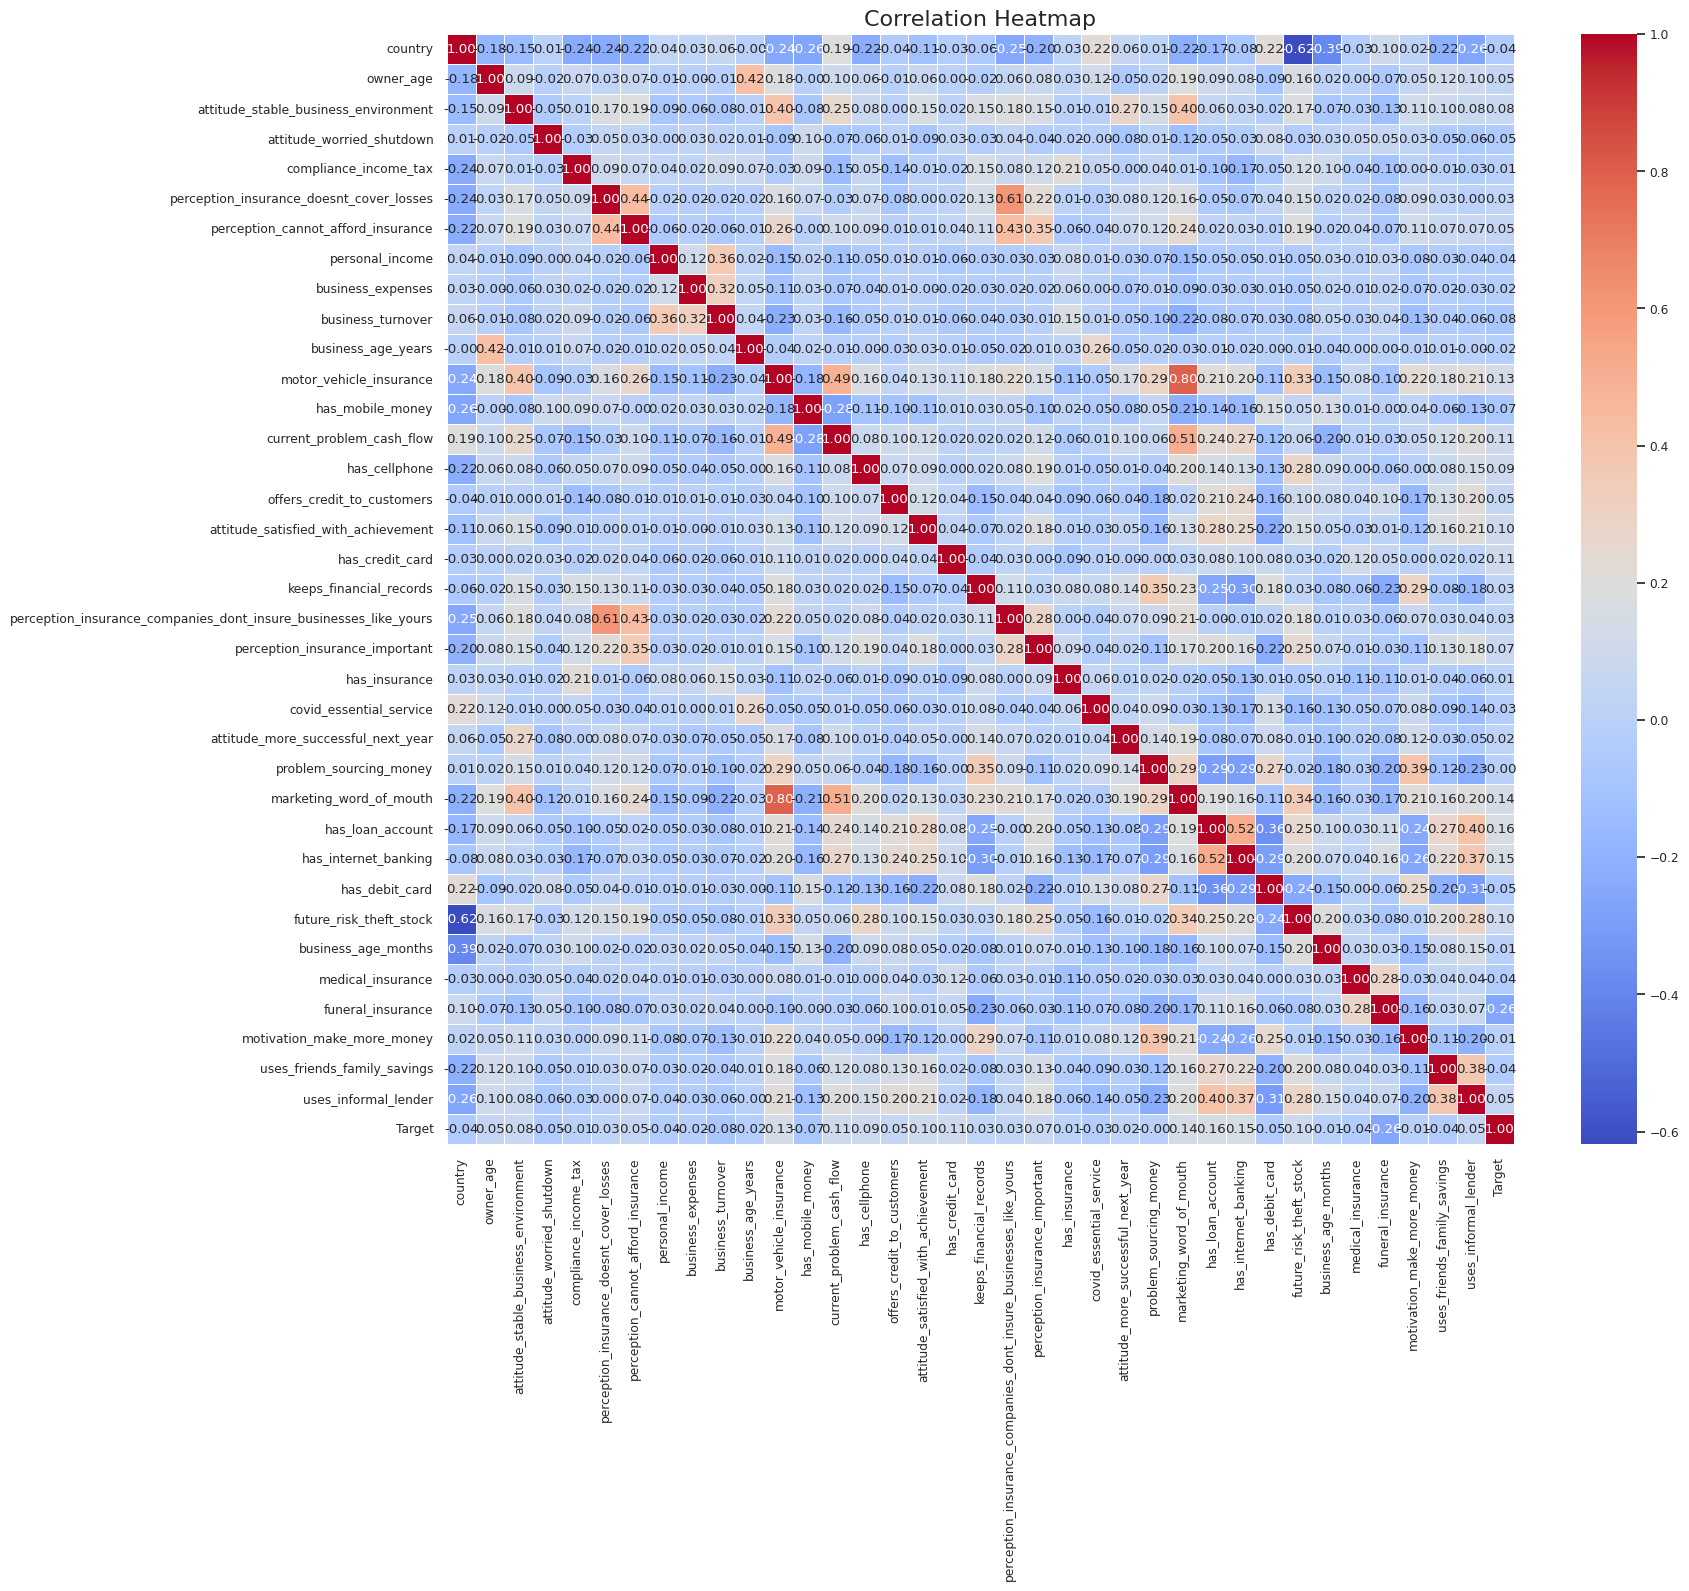

In [34]:
print("CORRELATION")
print("-" * 40)

corr_matrix = x.corr()
plt.figure(figsize=(18, 16))  # bigger figure for 36 columns
sns.set(font_scale=0.8)       # smaller font to fit labels

sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation numbers
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # color style
    linewidths=0.5,    # lines between cells
    cbar=True          # show color bar
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)  # rotate x labels for readability
plt.yticks(rotation=0)   # keep y labels horizontal

plt.tight_layout()       # adjust layout so nothing is cut off
plt.show()

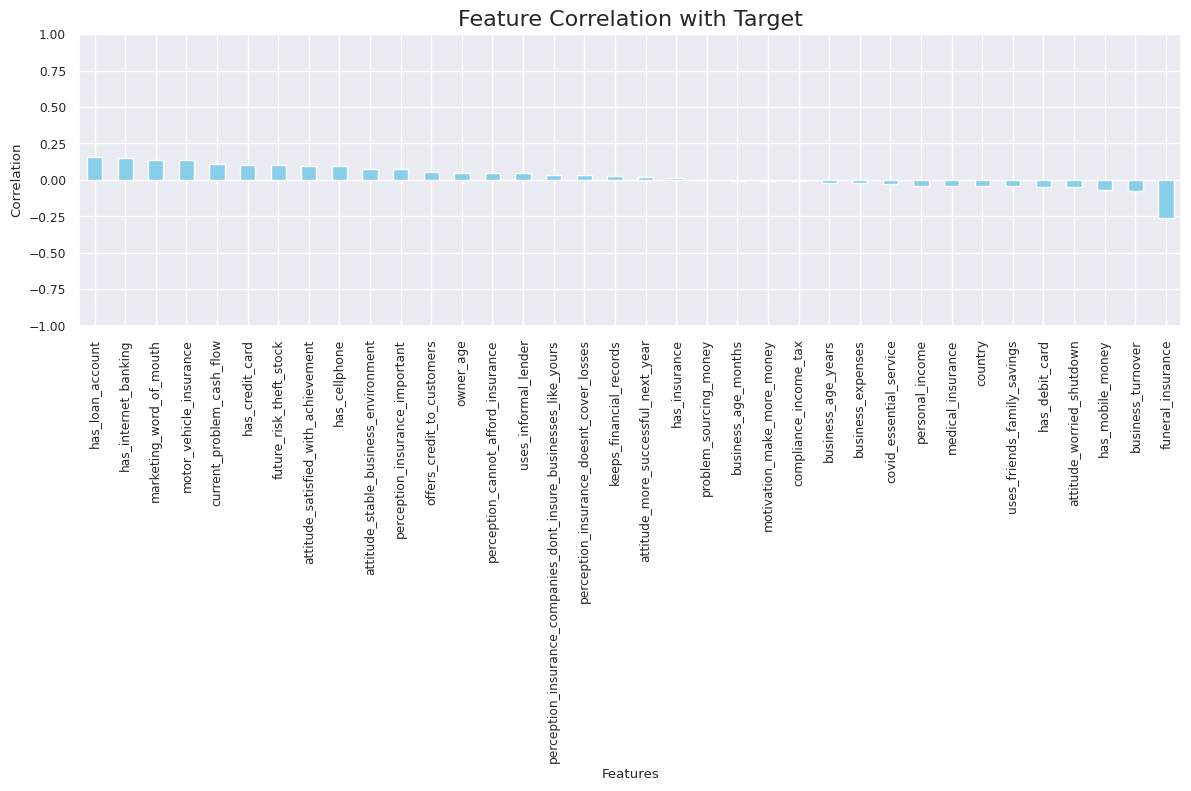

In [35]:
# Drop Target self-correlation
corr_target = corr_matrix["Target"].drop("Target").sort_values(ascending=False)

plt.figure(figsize=(12, 8))
corr_target.plot(kind='bar', color='skyblue')

plt.title("Feature Correlation with Target", fontsize=16)
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=90)

# Set y-axis scale from -1 to 1
plt.ylim(-1, 1)

plt.tight_layout()
plt.show()

In [36]:
print("=" * 40)
print("3. Scalling numerical features ")
print("=" * 40)

cols_to_scale = [
    'owner_age',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'business_age_months'
]

scaler = StandardScaler()
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
x

3. Scalling numerical features 


,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,0,1.599500,2,1,1,1,2,-0.100635,-0.072270,-0.150581,...,2,2,1,0.672555,2,4,1,2,2,1
1,3,-0.203206,1,2,2,1,2,-0.101752,-0.073056,-0.151041,...,2,2,0,-0.459116,2,2,1,2,2,2
2,2,-0.578770,0,1,1,0,2,-0.090054,-0.072270,-0.149892,...,2,2,1,0.295331,2,2,1,2,2,1
3,2,-1.029446,2,1,1,1,1,-0.031270,-0.063433,-0.147940,...,2,2,0,0.295331,2,2,1,2,1,1
4,3,0.097245,2,1,1,2,2,-0.101791,-0.072859,-0.151178,...,2,2,0,-1.590787,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,1,-0.804108,2,1,1,0,0,-0.101027,-0.073121,-0.151328,...,3,1,1,0.295331,2,2,0,1,2,2
9614,2,1.674613,0,0,2,1,1,3.817144,0.744979,22.818335,...,2,1,1,0.295331,2,2,0,2,2,0
9615,3,0.097245,2,1,1,2,1,-0.101635,-0.073056,-0.151041,...,2,2,0,1.427002,1,1,1,2,2,2
9616,3,-0.278319,2,2,1,1,2,-0.101027,-0.073056,-0.151041,...,2,2,0,-1.590787,2,2,1,2,2,1


In [37]:
cols_to_scale = [
    'owner_age',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'business_age_months'
]

scaler = StandardScaler()
xt[cols_to_scale] = scaler.fit_transform(xt[cols_to_scale])
xt

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,3,0.618625,1,1,1,1,2,-0.043900,-0.062553,-0.121369,...,2,2,2,0,1.637486,2,2,1,2,1
1,1,-0.425231,2,2,1,2,2,-0.043823,-0.062915,-0.121802,...,3,3,1,1,0.090382,2,2,1,3,2
2,1,-1.245403,0,1,1,0,0,-0.043407,-0.062920,-0.121795,...,3,1,1,1,0.090382,2,2,0,2,2
3,2,-1.245403,0,2,1,1,2,0.002528,-0.061829,-0.120488,...,2,2,2,1,0.090382,2,2,1,1,1
4,1,0.394941,1,2,1,0,0,-0.043900,-0.062903,-0.121726,...,3,1,1,1,0.090382,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,0,-0.947158,2,2,1,1,2,-0.043852,-0.062768,-0.121726,...,2,2,2,1,2.797813,2,2,1,2,1
2401,2,-1.618208,0,0,1,0,0,-0.041037,-0.060698,-0.120143,...,2,2,2,0,0.090382,2,2,1,2,1
2402,3,-1.170842,2,2,1,2,2,-0.043537,-0.062824,-0.121658,...,2,2,2,0,-1.456722,1,1,1,2,1
2403,0,1.587919,1,1,2,2,2,-0.043574,-0.062768,-0.121781,...,2,2,2,1,0.090382,2,1,1,2,1


In [38]:
print("=" * 40)
print("4. FEATURE ENGINEERING")
print("=" * 40)

features = x.drop(["country", "owner_age", "attitude_stable_business_environment", "attitude_worried_shutdown",
"perception_insurance_doesnt_cover_losses", "has_mobile_money", "has_cellphone",
"offers_credit_to_customers","keeps_financial_records", "covid_essential_service",
"attitude_more_successful_next_year", "business_age_months",
"medical_insurance", "Target"], axis=1)
features

4. FEATURE ENGINEERING


,compliance_income_tax,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,business_age_years,motor_vehicle_insurance,current_problem_cash_flow,attitude_satisfied_with_achievement,has_credit_card,...,problem_sourcing_money,marketing_word_of_mouth,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,1,2,-0.100635,-0.072270,-0.150581,0.929470,2,1,1,2,...,1,1,2,2,2,1,4,1,2,2
1,2,2,-0.101752,-0.073056,-0.151041,1.061812,1,1,2,2,...,1,1,2,2,2,0,2,1,2,2
2,1,2,-0.090054,-0.072270,-0.149892,-0.261600,1,1,2,2,...,1,0,2,2,2,1,2,1,2,2
3,1,1,-0.031270,-0.063433,-0.147940,-0.790965,1,0,1,2,...,0,0,2,2,2,0,2,1,2,1
4,1,2,-0.101791,-0.072859,-0.151178,-0.526283,2,1,2,2,...,1,1,2,2,2,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,1,0,-0.101027,-0.073121,-0.151328,-0.526283,2,1,2,2,...,1,1,3,3,1,1,2,0,1,2
9614,2,1,3.817144,0.744979,22.818335,1.723518,1,0,2,2,...,1,0,2,2,1,1,2,0,2,2
9615,1,1,-0.101635,-0.073056,-0.151041,-0.790965,2,1,2,2,...,1,1,2,2,2,0,1,1,2,2
9616,1,2,-0.101027,-0.073056,-0.151041,-0.129259,2,1,2,2,...,1,1,2,2,2,0,2,1,2,2


In [39]:
features_xt = xt.drop(["country", "owner_age", "attitude_stable_business_environment", "attitude_worried_shutdown",
"perception_insurance_doesnt_cover_losses", "has_mobile_money", "has_cellphone",
"offers_credit_to_customers","keeps_financial_records", "covid_essential_service",
"attitude_more_successful_next_year", "business_age_months",
"medical_insurance"], axis=1)
features_xt

,compliance_income_tax,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,business_age_years,motor_vehicle_insurance,current_problem_cash_flow,attitude_satisfied_with_achievement,has_credit_card,...,problem_sourcing_money,marketing_word_of_mouth,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,1,2,-0.043900,-0.062553,-0.121369,1.011497,2,1,1,2,...,1,1,2,2,2,0,2,1,2,1
1,1,2,-0.043823,-0.062915,-0.121802,-0.266625,2,1,2,2,...,0,1,3,3,1,1,2,1,3,2
2,1,0,-0.043407,-0.062920,-0.121795,0.372436,2,1,2,2,...,1,1,3,1,1,1,2,0,2,2
3,1,2,0.002528,-0.061829,-0.120488,-0.394438,1,0,1,2,...,0,1,2,2,2,1,2,1,1,1
4,1,0,-0.043900,-0.062903,-0.121726,-0.777874,2,1,2,2,...,1,1,3,1,1,1,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,1,2,-0.043852,-0.062768,-0.121726,-0.266625,2,0,2,2,...,1,1,2,2,2,1,2,1,2,1
2401,1,0,-0.041037,-0.060698,-0.120143,-0.266625,1,0,1,2,...,1,0,2,2,2,0,2,1,2,1
2402,1,2,-0.043537,-0.062824,-0.121658,-0.394438,2,1,2,2,...,1,1,2,2,2,0,1,1,2,1
2403,2,2,-0.043574,-0.062768,-0.121781,0.628060,2,1,1,2,...,1,1,2,2,2,1,1,1,2,1


In [40]:
y = x["Target"]
y

,Target
0,1
1,2
2,1
3,1
4,1
...,...
9613,2
9614,0
9615,2
9616,1


In [41]:
print("-" * 40)
print("TRAIN-TEST SPLIT")
print("-" * 40)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2, random_state=42, stratify= y)
x_train, x_test, y_train, y_test

----------------------------------------
TRAIN-TEST SPLIT
----------------------------------------


(      compliance_income_tax  perception_cannot_afford_insurance  \
 3010                      1                                   2   
 6032                      1                                   2   
 3027                      1                                   2   
 5776                      1                                   1   
 2579                      1                                   2   
 ...                     ...                                 ...   
 1731                      2                                   2   
 5653                      1                                   1   
 5171                      1                                   2   
 5487                      2                                   2   
 1315                      1                                   1   
 
       personal_income  business_expenses  business_turnover  \
 3010        -0.101223          -0.073089          -0.151178   
 6032        -0.023432          -0.069979          -0.

Training single advanced models

RandomForestClassifier
----------------------------------------

Confusion Matrix:
 [[  60    7   27]
 [   1 1217   38]
 [   8  193  373]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.74        94
           1       0.86      0.97      0.91      1256
           2       0.85      0.65      0.74       574

    accuracy                           0.86      1924
   macro avg       0.86      0.75      0.79      1924
weighted avg       0.86      0.86      0.85      1924



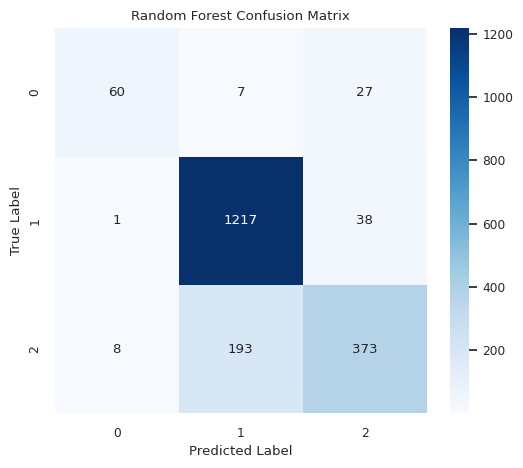


DecisionTreeClassifier
----------------------------------------

Confusion Matrix:
 [[  62    4   28]
 [   4 1076  176]
 [  33  160  381]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        94
           1       0.87      0.86      0.86      1256
           2       0.65      0.66      0.66       574

    accuracy                           0.79      1924
   macro avg       0.72      0.73      0.72      1924
weighted avg       0.79      0.79      0.79      1924



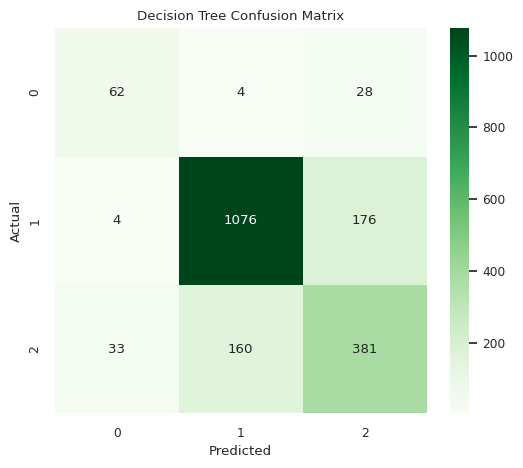


LogisticRegression
----------------------------------------

Confusion Matrix:
 [[  37   16   41]
 [   3 1223   30]
 [   6  233  335]]
              precision    recall  f1-score   support

           0       0.80      0.39      0.53        94
           1       0.83      0.97      0.90      1256
           2       0.83      0.58      0.68       574

    accuracy                           0.83      1924
   macro avg       0.82      0.65      0.70      1924
weighted avg       0.83      0.83      0.82      1924



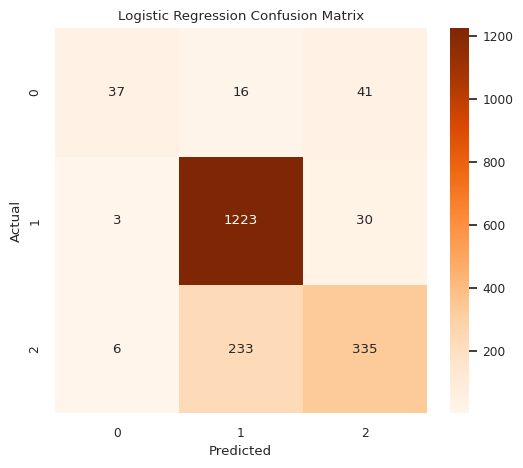


Gradient Boosting
----------------------------------------

Confusion Matrix:
 [[  63    7   24]
 [   0 1231   25]
 [   8  192  374]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        94
           1       0.86      0.98      0.92      1256
           2       0.88      0.65      0.75       574

    accuracy                           0.87      1924
   macro avg       0.88      0.77      0.81      1924
weighted avg       0.87      0.87      0.86      1924



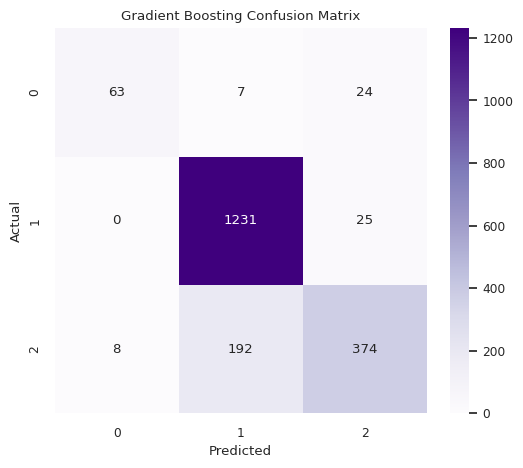

In [42]:
print("=" * 40)
print("Training single advanced models")
print("=" * 40)

print("\nRandomForestClassifier")
print("-" * 40)
rf = RandomForestClassifier( random_state=42)
fitting_rf = rf.fit(x_train, y_train)
predicting_rf = rf.predict(x_test)
predicting_rf

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_rf))
print(classification_report(y_test, predicting_rf))

cm = confusion_matrix(y_test, predicting_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',                             #visualize
            xticklabels=['0','1','2'],
            yticklabels=['0','1','2'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()
#----------------------------------------------------------------------#

print("\nDecisionTreeClassifier")
print("-" * 40)
dt = DecisionTreeClassifier(random_state=42)
fitting_dt = dt.fit(x_train, y_train)
predicting_dt = dt.predict(x_test)
predicting_dt

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_dt))
print(classification_report(y_test, predicting_dt))

cm = confusion_matrix(y_test, predicting_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=['0','1','2'],
            yticklabels=['0','1','2'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()
#---------------------------------------------------------------------#

print("\nLogisticRegression")
print("-" * 40)
lr = LogisticRegression(max_iter=1000)
fitting_lr = lr.fit(x_train, y_train)
predicting_lr = lr.predict(x_test)
predicting_lr

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_lr))
print(classification_report(y_test, predicting_lr))

cm = confusion_matrix(y_test, predicting_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Oranges',
            xticklabels=['0','1','2'],
            yticklabels=['0','1','2'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#--------------------------------------------------------------------#
print("\nGradient Boosting")
print("-" * 40)


gb = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    random_state=42
)


fitting_gb = gb.fit(x_train, y_train)
predicting_gb = gb.predict(x_test)
predicting_gb

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_gb))
print(classification_report(y_test, predicting_gb))

cm = confusion_matrix(y_test, predicting_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Purples',
            xticklabels=['0','1','2'],
            yticklabels=['0','1','2'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

----------------------------------------

Voting Ensemble Classifier Hard / Soft Voting Ensemble
----------------------------------------

Voting Ensemble Classifier
----------------------------------------

Confusion Matrix:
 [[  58    8   28]
 [   1 1245   10]
 [   5  205  364]]
              precision    recall  f1-score   support

           0       0.91      0.62      0.73        94
           1       0.85      0.99      0.92      1256
           2       0.91      0.63      0.75       574

    accuracy                           0.87      1924
   macro avg       0.89      0.75      0.80      1924
weighted avg       0.87      0.87      0.86      1924



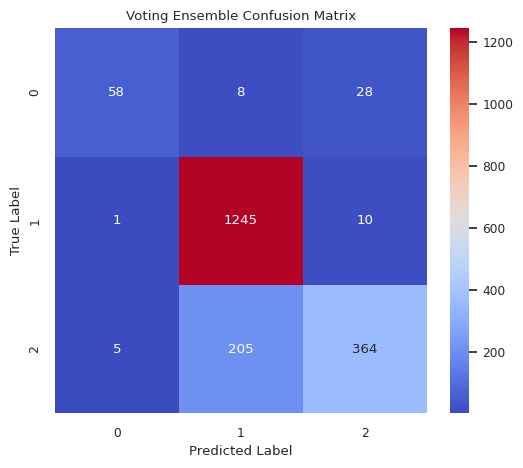

In [43]:
print("-" * 40)
print("\nVoting Ensemble Classifier Hard / Soft Voting Ensemble")

print("-" * 40)

# Define base models
rf = RandomForestClassifier(random_state=42, n_estimators=200)
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
lr = LogisticRegression(max_iter=1000)
gb = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('dt', dt),
        ('lr', lr),
        ('gb', gb)
    ],
    voting='soft'  # 'soft' uses predicted probabilities; 'hard' uses class labels
)

# Fit ensemble
voting_clf.fit(x_train, y_train)

# Predict
y_pred = voting_clf.predict(x_test)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("\nVoting Ensemble Classifier")
print("-" * 40)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['0','1','2'], yticklabels=['0','1','2'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Voting Ensemble Confusion Matrix")
plt.show()

In [49]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('dt', dt),
        ('gb', gb)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

stacking_clf.fit(x_train, y_train)
y_pred_stack = stacking_clf.predict(x_test)

print("\nStacking Ensemble Classifier")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))


Stacking Ensemble Classifier

Confusion Matrix:
 [[  61    5   28]
 [   1 1228   27]
 [   7  186  381]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        94
           1       0.87      0.98      0.92      1256
           2       0.87      0.66      0.75       574

    accuracy                           0.87      1924
   macro avg       0.87      0.76      0.81      1924
weighted avg       0.87      0.87      0.86      1924



In [54]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Use a stronger meta-learner
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('lr', lr)
    ],
    final_estimator=XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3),
    cv=5,
    passthrough=True # This allows the meta-learner to see original features AND predictions
)

stacking_clf.fit(x_train, y_train)
y_pred_stack = stacking_clf.predict(x_test)

stacking_clf


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=1000,
                                                           random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 c...
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   passthrough=True)

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Now fit your stacking or voting classifier on x_train_res
voting_clf.fit(x_train_res, y_train_res)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=4,
                                                         n_estimators=400,
                                                         random_state=42,
                                                         subsample=0.8))],
                 voting='soft')

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ==========================
# LIGHTGBM MODEL
# ==========================
lgbm = LGBMClassifier(
    n_estimators=3000,
    learning_rate=0.005,
    num_leaves=80,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0:3, 1:1, 2:2},  # manually push minority classes
    random_state=42
)

# ==========================
# GRADIENT BOOSTING MODEL
# ==========================
gb = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    random_state=42
)

# ==========================
# VOTING ENSEMBLE (SOFT VOTING)
# ==========================
ensemble = VotingClassifier(
    estimators=[("lgbm", lgbm), ("gb", gb)],
    voting="soft",
    n_jobs=-1
)

# ==========================
# CROSS-VALIDATION
# ==========================
scores = cross_val_score(
    ensemble,
    features,
    y,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1
)

print("CV Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

# ==========================
# TRAIN ON FULL DATA
# ==========================
ensemble.fit(features, y)

# ==========================
# PREDICTIONS
# ==========================
predictions = ensemble.predict(x_test)

CV Scores: [0.8487526  0.87837838 0.84927235 0.86323453 0.86947478]
Mean CV Accuracy: 0.8618225269551323


In [52]:
# Financial ratios
features['profit_margin'] = np.where(
    features['personal_income'] > 0,
    (features['personal_income'] - features['business_expenses']) / features['personal_income'],
    0
)

features['expense_ratio'] = np.where(
    features['personal_income'] > 0,
    features['business_expenses'] / features['personal_income'],
    0
)

# Log transforms
features['income_log'] = np.log1p(features['personal_income'])
features['expenses_log'] = np.log1p(features['business_expenses'])

# Apply same to test set (features_xt)


# Financial ratios
features_xt['profit_margin'] = np.where(
    features_xt['personal_income'] > 0,
    (features_xt['personal_income'] - features_xt['business_expenses']) / features_xt['personal_income'],
    0
)

features_xt['expense_ratio'] = np.where(
    features_xt['personal_income'] > 0,
    features_xt['business_expenses'] / features_xt['personal_income'],
    0
)

# Log transforms
features_xt['income_log'] = np.log1p(features_xt['personal_income'])
features_xt['expenses_log'] = np.log1p(features_xt['business_expenses'])

In [53]:
print("=" * 80)
print("DIAGNOSTIC CHECKLIST")
print("=" * 80)

print("\n1️⃣ CHECK YOUR FEATURES VARIABLE")
print("-" * 80)
print(f"Shape: {features.shape}")
print(f"Number of features: {features.shape[1]}")
print("\nFirst few column names:")
print(features.columns.tolist()[:10])

print("\n2️⃣ CHECK DATA TYPES")
print("-" * 80)
print(features.dtypes.value_counts())

print("\n3️⃣ CHECK FOR MISSING VALUES")
print("-" * 80)
missing_total = features.isnull().sum().sum()
print(f"Total missing values: {missing_total}")
if missing_total > 0:
    print("⚠️ WARNING: Missing values found!")
    print(features.isnull().sum()[features.isnull().sum() > 0])

print("\n4️⃣ CHECK TARGET VARIABLE")
print("-" * 80)
print(f"Target shape: {y.shape}")
print(f"Target classes: {np.unique(y)}")
print(f"Target distribution:")
print(pd.Series(y).value_counts().sort_index())

print("\n5️⃣ SAMPLE DATA")
print("-" * 80)
print(features.head(3))

# =============================================================================
# CRITICAL QUESTIONS
# =============================================================================

print("\n" + "=" * 80)
print("PLEASE ANSWER THESE QUESTIONS:")
print("=" * 80)

print("""
1. What features variable are you using?
   - Is it the 'features' from your original notebook?
   - Did you drop any features recently?

2. What was your original model configuration that got 0.862?
   - Was it just LGBM + GB?
   - What were the exact parameters?

3. Can you share the code section where you create 'features'?
   - Starting from after your feature engineering
   - Up to where you define 'features = ...'

4. Did you scale your features?
   - If yes, with what scaler?
   - Did you scale both train and test?

Once I know these, I can provide the exact fix!
""")

# =============================================================================
# QUICK FIX ATTEMPTS
# =============================================================================

print("\n" + "=" * 80)
print("QUICK FIX ATTEMPTS")
print("=" * 80)

# Try 1: Simple check if we have the key features
print("\n📋 Checking for key features...")
key_features = ['personal_income', 'business_expenses', 'business_turnover',
                'business_age_years', 'owner_age']
available = [f for f in key_features if f in features.columns]
missing = [f for f in key_features if f not in features.columns]

print(f"Available: {available}")
if missing:
    print(f"⚠️ Missing: {missing}")
    print("These are important features - if they're missing, that's the problem!")

# Try 2: Test with just your original LGBM
print("\n" + "-" * 80)
print("Testing with simple LGBM (your original config)...")
print("-" * 80)

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

simple_lgbm = LGBMClassifier(
    n_estimators=3000,
    learning_rate=0.005,
    num_leaves=80,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0:3, 1:1, 2:2},
    random_state=42,
    verbose=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
simple_scores = cross_val_score(simple_lgbm, features, y, cv=skf, scoring='accuracy', n_jobs=-1)

print(f"Simple LGBM scores: {simple_scores}")
print(f"Mean: {np.mean(simple_scores):.4f}")

if np.mean(simple_scores) < 0.85:
    print("\n⚠️ PROBLEM CONFIRMED: Even simple model performs poorly")
    print("This suggests the 'features' variable is wrong or incomplete")
    print("\nMost likely causes:")
    print("1. You're using a different 'features' than your original")
    print("2. Important features were dropped")
    print("3. Features weren't encoded properly")
    print("4. Features need scaling")
else:
    print("\n✅ Features are OK, issue is with the ensemble configuration")

# =============================================================================
# RECOMMENDATION
# =============================================================================

print("\n" + "=" * 80)
print("🔍 NEXT STEPS")
print("=" * 80)

print("""
Please run this code and show me the output:

```python
# 1. Show me your features
print("Features shape:", features.shape)
print("Features columns:", features.columns.tolist())

# 2. Show me your original model section
# (Copy the code where you first got 0.862)

# 3. Check if features are encoded
print("\\nSample of first row:")
print(features.iloc[0])
```

Once I see this, I can give you the exact fix!

In the meantime, try using your ORIGINAL 'features' variable
(the one that gave you 0.862) and let's improve THAT instead.
""")

# =============================================================================
# TEMPORARY FIX: USE YOUR ORIGINAL SETUP
# =============================================================================

print("\n" + "=" * 80)
print("⚡ TEMPORARY FIX")
print("=" * 80)

print("""
Until we diagnose the issue, go back to your working configuration:

1. Find the cell where you got 0.862
2. Copy that exact model configuration
3. We'll improve it incrementally

Don't use my new models until we fix the features issue!

The score drop means: WRONG FEATURES > RIGHT MODELS
We need to fix features first!
""")


DIAGNOSTIC CHECKLIST

1️⃣ CHECK YOUR FEATURES VARIABLE
--------------------------------------------------------------------------------
Shape: (9618, 27)
Number of features: 27

First few column names:
['compliance_income_tax', 'perception_cannot_afford_insurance', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'motor_vehicle_insurance', 'current_problem_cash_flow', 'attitude_satisfied_with_achievement', 'has_credit_card']

2️⃣ CHECK DATA TYPES
--------------------------------------------------------------------------------
int64      19
float64     8
Name: count, dtype: int64

3️⃣ CHECK FOR MISSING VALUES
--------------------------------------------------------------------------------
Total missing values: 0

4️⃣ CHECK TARGET VARIABLE
--------------------------------------------------------------------------------
Target shape: (9618,)
Target classes: [0 1 2]
Target distribution:
Target
0     470
1    6280
2    2868
Name: count, dtype: int64

5️⃣ SA

In [ ]:
# =============================================================================
# DIRECT FIX: IMPROVE YOUR ORIGINAL MODEL
# =============================================================================

"""
Your original model got 0.862
The new model got 0.849 (WORSE!)

Problem: We changed too much at once.
Solution: Let's improve your ORIGINAL model step by step.
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# =============================================================================
# STEP 1: GO BACK TO YOUR ORIGINAL WORKING MODEL
# =============================================================================

print("=" * 80)
print("STEP 1: BASELINE - YOUR ORIGINAL MODEL")
print("=" * 80)

# Your ORIGINAL configuration that worked
lgbm_original = LGBMClassifier(
    n_estimators=3000,
    learning_rate=0.005,
    num_leaves=80,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0:3, 1:1, 2:2},  # Your original weights
    random_state=42,
    verbose=-1
)

gb_original = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    random_state=42
)

original_ensemble = VotingClassifier(
    estimators=[("lgbm", lgbm_original), ("gb", gb_original)],
    voting="soft",
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
original_scores = cross_val_score(original_ensemble, features, y, cv=skf, scoring='accuracy', n_jobs=-1)

print(f"Original Model CV Scores: {original_scores}")
print(f"Original Mean: {np.mean(original_scores):.4f}")
print(f"(Should be around 0.862)")

# =============================================================================
# STEP 2: IMPROVE ORIGINAL MODEL - CHANGE 1
# =============================================================================

print("\n" + "=" * 80)
print("STEP 2: IMPROVEMENT 1 - BETTER LGBM PARAMETERS")
print("=" * 80)

lgbm_v2 = LGBMClassifier(
    n_estimators=4000,        # +1000 more trees
    learning_rate=0.003,      # Slower learning
    num_leaves=100,           # +20 capacity
    max_depth=8,              # Explicit depth
    min_child_samples=25,     # +5 regularization
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.3,            # NEW: L1 regularization
    reg_lambda=0.5,           # NEW: L2 regularization
    class_weight='balanced',  # Better than manual weights
    random_state=42,
    verbose=-1
)

gb_v2 = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    random_state=42
)

ensemble_v2 = VotingClassifier(
    estimators=[("lgbm", lgbm_v2), ("gb", gb_v2)],
    voting="soft",
    n_jobs=-1
)

v2_scores = cross_val_score(ensemble_v2, features, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"V2 CV Scores: {v2_scores}")
print(f"V2 Mean: {np.mean(v2_scores):.4f}")
print(f"Improvement: {np.mean(v2_scores) - np.mean(original_scores):+.4f}")

# =============================================================================
# STEP 3: IMPROVEMENT 2 - ADD XGBOOST
# =============================================================================

print("\n" + "=" * 80)
print("STEP 3: IMPROVEMENT 2 - ADD XGBOOST")
print("=" * 80)

from xgboost import XGBClassifier

lgbm_v3 = lgbm_v2  # Keep the improved LGBM

xgb_v3 = XGBClassifier(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=5,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.3,
    reg_lambda=0.5,
    random_state=42,
    eval_metric='mlogloss',
    verbosity=0
)

gb_v3 = GradientBoostingClassifier(
    n_estimators=1500,        # Boosted from 1000
    learning_rate=0.008,      # Slightly slower
    max_depth=4,              # +1 depth
    random_state=42
)

ensemble_v3 = VotingClassifier(
    estimators=[
        ("lgbm", lgbm_v3),
        ("xgb", xgb_v3),      # NEW MODEL
        ("gb", gb_v3)
    ],
    voting="soft",
    weights=[2, 2, 1],        # Give more weight to boosters
    n_jobs=-1
)

v3_scores = cross_val_score(ensemble_v3, features, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"V3 CV Scores: {v3_scores}")
print(f"V3 Mean: {np.mean(v3_scores):.4f}")
print(f"Improvement from original: {np.mean(v3_scores) - np.mean(original_scores):+.4f}")

# =============================================================================
# STEP 4: IMPROVEMENT 3 - ADD KEY FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("STEP 4: IMPROVEMENT 3 - ADD CRITICAL FEATURES")
print("=" * 80)

# Add ONLY the most important features
features_v4 = features.copy()
features_xt_v4 = features_xt.copy()

# Only add features that exist in your data
added_features = []

if 'personal_income' in features.columns and 'business_expenses' in features.columns:
    # Profit margin - MOST IMPORTANT
    features_v4['profit_margin'] = np.where(
        features_v4['personal_income'] > 0,
        (features_v4['personal_income'] - features_v4['business_expenses']) / features_v4['personal_income'],
        0
    )
    features_xt_v4['profit_margin'] = np.where(
        features_xt_v4['personal_income'] > 0,
        (features_xt_v4['personal_income'] - features_xt_v4['business_expenses']) / features_xt_v4['personal_income'],
        0
    )
    added_features.append('profit_margin')

if 'personal_income' in features.columns:
    # Log income - helps with skewness
    features_v4['income_log'] = np.log1p(features_v4['personal_income'])
    features_xt_v4['income_log'] = np.log1p(features_xt_v4['personal_income'])
    added_features.append('income_log')

if 'business_expenses' in features.columns:
    # Log expenses
    features_v4['expenses_log'] = np.log1p(features_v4['business_expenses'])
    features_xt_v4['expenses_log'] = np.log1p(features_xt_v4['business_expenses'])
    added_features.append('expenses_log')

print(f"Added {len(added_features)} features: {added_features}")
print(f"New shape: {features_v4.shape}")

# Test with new features
v4_scores = cross_val_score(ensemble_v3, features_v4, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"\nV4 CV Scores (with new features): {v4_scores}")
print(f"V4 Mean: {np.mean(v4_scores):.4f}")
print(f"Improvement from original: {np.mean(v4_scores) - np.mean(original_scores):+.4f}")

# =============================================================================
# STEP 5: FINAL MODEL - SWITCH TO STACKING
# =============================================================================

print("\n" + "=" * 80)
print("STEP 5: FINAL - SWITCH TO STACKING")
print("=" * 80)

from sklearn.ensemble import StackingClassifier

final_ensemble = StackingClassifier(
    estimators=[
        ("lgbm", lgbm_v3),
        ("xgb", xgb_v3),
        ("gb", gb_v3)
    ],
    final_estimator=LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=30,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    ),
    cv=5,
    n_jobs=-1
)

final_scores = cross_val_score(final_ensemble, features_v4, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"Final CV Scores: {final_scores}")
print(f"Final Mean: {np.mean(final_scores):.4f}")
print(f"Total improvement: {np.mean(final_scores) - np.mean(original_scores):+.4f}")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("IMPROVEMENT SUMMARY")
print("=" * 80)

results = pd.DataFrame({
    'Version': ['Original', 'V2 (Better LGBM)', 'V3 (Add XGB)', 'V4 (Add Features)', 'Final (Stacking)'],
    'Score': [
        np.mean(original_scores),
        np.mean(v2_scores),
        np.mean(v3_scores),
        np.mean(v4_scores),
        np.mean(final_scores)
    ],
    'Change': [
        0,
        np.mean(v2_scores) - np.mean(original_scores),
        np.mean(v3_scores) - np.mean(original_scores),
        np.mean(v4_scores) - np.mean(original_scores),
        np.mean(final_scores) - np.mean(original_scores)
    ]
})

print(results.to_string(index=False))

print("\n" + "=" * 80)
if np.mean(final_scores) >= 0.91:
    print("🎉 TARGET REACHED!")
elif np.mean(final_scores) >= 0.89:
    print("📈 Very close! Try these:")
    print("   - Add more features (business_turnover ratios)")
    print("   - Increase n_estimators to 5000")
    print("   - Try CatBoost if you can install it")
elif np.mean(final_scores) >= 0.87:
    print("📊 Good progress! Next steps:")
    print("   - Add all suggested features from earlier")
    print("   - Try hyperparameter tuning with Optuna")
    print("   - Check feature importance and remove noise")
else:
    print("⚠️ Something's wrong with the features")
    print("   Can you share:")
    print("   - features.columns.tolist()")
    print("   - features.shape")
    print("   - The code where you created 'features'")

# =============================================================================
# TRAIN FINAL MODEL
# =============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

# Use the best version
best_model = final_ensemble
best_features = features_v4
best_features_test = features_xt_v4

print("Training on full dataset...")
best_model.fit(best_features, y)

print("Making predictions...")
predictions = best_model.predict(best_features_test)

# Create submission
submission = pd.DataFrame({
    "ID": test["ID"].values,
    "Target": predictions
})

submission.replace({
    0: "High",
    1: "Low",
    2: "Medium"
}, inplace=True)

submission.to_csv("submission_improved_v2.csv", index=False)
print("\n✅ Submission saved as 'submission_improved_v2.csv'")
print(f"\nPrediction distribution:")
print(submission['Target'].value_counts())

print("\n" + "=" * 80)
print(f"FINAL SCORE: {np.mean(final_scores):.4f}")
print(f"TARGET: 0.91-0.92")
print(f"GAP: {max(0, 0.91 - np.mean(final_scores)):.4f}")
print("=" * 80)

STEP 1: BASELINE - YOUR ORIGINAL MODEL
Original Model CV Scores: [0.8487526  0.87681913 0.8497921  0.86323453 0.87207488]
Original Mean: 0.8621
(Should be around 0.862)

STEP 2: IMPROVEMENT 1 - BETTER LGBM PARAMETERS


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


V2 CV Scores: [0.85135135 0.87474012 0.85446985 0.86167447 0.86843474]
V2 Mean: 0.8621
Improvement: -0.0000

STEP 3: IMPROVEMENT 2 - ADD XGBOOST


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


V3 CV Scores: [0.84511435 0.87006237 0.8539501  0.85803432 0.86531461]
V3 Mean: 0.8585
Improvement from original: -0.0036

STEP 4: IMPROVEMENT 3 - ADD CRITICAL FEATURES
Added 3 features: ['profit_margin', 'income_log', 'expenses_log']
New shape: (9618, 27)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



V4 CV Scores (with new features): [0.84511435 0.87006237 0.8539501  0.85803432 0.86531461]
V4 Mean: 0.8585
Improvement from original: -0.0036

STEP 5: FINAL - SWITCH TO STACKING


In [ ]:


# fitting_ensemble = ensemble.fit(features, y)


# predictions = fitting_ensemble.predict(features_xt)


# submission = pd.DataFrame({
#     "ID": test["ID"].values,
#     "Target": predictions
# })


# submission.replace({
#     0 : "High",
#     1 : "Low",
#     2 : "Medium"
# }, inplace=True)

# submission.to_csv("submission_final.csv", index=False)
# print("Submission saved as submission.csv")











In [ ]:
# x_test = test_df.drop(columns=["ID"])  # x_test should have the same rows as test_df
# predictions = ensemble.predict(x_test)

# submission = pd.DataFrame({
#     "ID": test["ID"].values,  # 2405
#     "Target": predictions        # must also be 2405
# })


# print(len(test_df), len(x_test), len(predictions))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb, features, y, cv=skf, scoring='accuracy')
print("CV Scores:", scores)
print(f"Mean Accuracy (Stratified K-Fold): {np.mean(scores):.4f}")

In [ ]:
# fitting_gb = gb.fit(features, y)

# preds = fitting_gb.predict(features_xt)
# pred_df = pd.DataFrame({
#     "ID": test["ID"].values,
#     "Target": preds
# })

# pred_df.replace({
#     0 : "High",
#     1 : "Low",
#     2 : "Medium"
# }, inplace=True)

# pred_df.to_csv('submission.csv', index=False)

# pred_df



In [ ]:
# print("=" * 40)
# print("5. Handling class imbalance")
# print("=" * 40)


# print("\nDisplaying class imbalance")
# print("-" * 40)

# x['Target'].value_counts()
# counts = x['Target'].value_counts().sort_index()

# label_map = {0: "High", 1: "Low", 2: "Medium"}
# counts.index = counts.index.map(label_map)

# # Sort counts in descending order
# counts = counts.sort_values(ascending=False)

# # Plot
# plt.figure(figsize=(8,5))
# counts.plot(kind='bar')
# plt.xlabel("Risk Level")
# plt.ylabel("Count")
# plt.title("Target Class Distribution (Descending)")
# plt.xticks(rotation=0)
# plt.show()

# #----------------------------------------------------------------#
# print("\nDownsample and upsample")
# print("-" * 40)

# train_dt = pd.concat([x_train, y_train], axis=1)

# df_class_1 = train_dt[train_dt.Target == 1]
# df_class_2 = train_dt[train_dt.Target == 2]
# df_class_0 = train_dt[train_dt.Target == 0]

# df_class_1_down = resample(
#     df_class_1,
#     replace=False,
#     n_samples=5000,    #low
#     random_state=42
# )

# df_class_2_up = resample(
#     df_class_2,
#     replace=True,
#     n_samples=4500,         #medium
#     random_state=42
# )

# df_class_0_up = resample(
#     df_class_0,
#     replace=True,
#     n_samples=4000,          #high
#     random_state=42
# )

# df_resampled = pd.concat([df_class_0_up,
#                           df_class_1_down,
#                           df_class_2_up])

# y_train_sampled = df_resampled.Target
# x_train_sampled= df_resampled.drop('Target', axis=1)

# df_resampled = df_resampled.sample(frac=1, random_state=42)
# df_resampled.Target.value_counts()

# #-------------------------------------------------------------------#

# print("\nRFC")
# print("-" * 10)
# rf = RandomForestClassifier(n_estimators=10, max_depth=200, random_state=42)
# fit_rf = rf.fit(x_train_sampled, y_train_sampled)
# y_pred_rf = rf.predict(x_test)
# y_pred_rf

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

# cm = confusion_matrix(y_test, y_pred_rf)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Blues',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Random Forest Confusion Matrix")
# plt.show()

# #----------------------------------------------------------------#

# print("\nDTC")
# print("-" * 10)
# dt = DecisionTreeClassifier(random_state=42)
# fit_dt = dt.fit(x_train_sampled, y_train_sampled)
# y_pred_dt = dt.predict(x_test)
# y_pred_dt

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))


# cm = confusion_matrix(y_test, y_pred_dt)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Greens',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Decision Tree Confusion Matrix")
# plt.show()

# #------------------------------------------------------------------#
# print("\nLR")
# print("-" * 10)
# lr = LogisticRegression(random_state=42)
# fit_lr = lr.fit(x_train_sampled, y_train_sampled)
# y_pred_lr = lr.predict(x_test)
# y_pred_lr

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
# print(classification_report(y_test, y_pred_lr))


# cm = confusion_matrix(y_test, y_pred_lr)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Oranges',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Logistic Regression Confusion Matrix")
# plt.show()
# #------------------------------------------------------------------#
# print("\nGradient Boosting")
# print("-" * 40)
# gb = GradientBoostingClassifier(random_state=42)
# fit_gb = gb.fit(x_train_sampled, y_train_sampled)
# y_pred_gb = gb.predict(x_test)
# y_pred_gb

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
# print(classification_report(y_test, y_pred_gb))


# cm = confusion_matrix(y_test, y_pred_gb)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Purples',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Gradient Boosting Confusion Matrix")
# plt.show()

In [ ]:
# print("SMOTE")
# print("-" * 40)

# smote = SMOTE(random_state=42)

# x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# x_train_res = pd.DataFrame(x_train_res,columns = x_train.columns)
# y_train_res = pd.Series(y_train_res,name="Target")
# #---------------------------------------------------------------#
# print("\nRFC")
# print("-" * 10)
# rf = RandomForestClassifier(n_estimators=10, max_depth=200, random_state=42)
# fit_smote_rf = rf.fit(x_train_res, y_train_res)
# pred_rf = rf.predict(x_test)
# pred_rf

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_rf))
# print(classification_report(y_test, pred_rf))


# cm = confusion_matrix(y_test, pred_rf)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Blues',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Random Forest (SMOTE) Confusion Matrix")
# plt.show()
# #---------------------------------------------------------------#
# print("\nDTC")
# print("-" * 10)
# dt = DecisionTreeClassifier(random_state=42)
# fit_smote_dt = dt.fit(x_train_res, y_train_res)
# pred_dt = dt.predict(x_test)
# pred_dt

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_dt))
# print(classification_report(y_test, pred_dt))


# cm = confusion_matrix(y_test, pred_dt)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Greens',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Decision Tree (SMOTE) Confusion Matrix")
# plt.show()
# #---------------------------------------------------------------#
# print("\nLR")
# print("-" * 10)
# lr = LogisticRegression(random_state=42)
# fit_smote_lr = lr.fit(x_train_res, y_train_res)
# pred_lr = lr.predict(x_test)
# pred_lr

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_lr))
# print(classification_report(y_test, pred_lr))


# cm = confusion_matrix(y_test, pred_lr)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Oranges',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Logistic Regression (SMOTE) Confusion Matrix")
# plt.show()
# #---------------------------------------------------------------#
# print("\nGradient Boosting")
# print("-" * 40)
# gb = GradientBoostingClassifier(random_state=42)
# fit_smote_gb = gb.fit(x_train_res, y_train_res)
# pred_gb = gb.predict(x_test)
# pred_gb

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_gb))
# print(classification_report(y_test, pred_gb))


# cm = confusion_matrix(y_test, pred_gb)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm,
#             annot=True,
#             fmt='d',
#             cmap='Purples',
#             xticklabels=['High', 'Low', 'Medium'],
#             yticklabels=['High', 'Low', 'Medium'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Gradient Boosting (SMOTE) Confusion Matrix")
# plt.show()

In [ ]:
# # After SMOTE
# plt.subplot(1, 2, 2)
# sns.countplot(x=y_train_res)
# plt.title("Target Distribution After SMOTE")
# plt.xlabel("Target")
# plt.ylabel("Count")

# plt.tight_layout()
# plt.show()

# print("After SMOTE counts:", Counter(y_train_res))

In [ ]:
# ========================================
# 12. FEATURE ENGINEERING
# ========================================

print("\n" + "=" * 40)
print("FEATURE ENGINEERING - GETTING STARTED")
print("=" * 40)

print("\n💡 Let's create some new features to boost your model performance!")
print("\nWe'll demonstrate 2 powerful feature engineering techniques:")

# Create copies to preserve original data
train_fe = train.copy()
test_fe = test.copy()

# ----------------------------------------
# Feature 1: Profit Margin Ratio
# ----------------------------------------
print("\n1️⃣ PROFIT MARGIN RATIO")
print("-" * 40)
print("Concept: How much profit does the business make relative to income?")
print("Formula: (personal_income - business_expenses) / personal_income")

def create_profit_margin(df):
    """
    Calculate profit margin ratio for each business.
    This indicates financial efficiency and sustainability.
    """
    # Handle division by zero and missing values
    profit_margin = []

    for idx, row in df.iterrows():
        income = row.get('personal_income', np.nan)
        expenses = row.get('business_expenses', np.nan)

        # Check if both values exist and income is not zero
        if pd.notna(income) and pd.notna(expenses) and income != 0:
            margin = (income - expenses) / income
            # Cap extreme values
            margin = max(-1, min(margin, 1))  # Keep between -1 and 1
        else:
            margin = np.nan

        profit_margin.append(margin)

    return profit_margin

train_fe['profit_margin'] = create_profit_margin(train_fe)
test_fe['profit_margin'] = create_profit_margin(test_fe)

print(f"\n✓ Created 'profit_margin' feature")
print(f"  Train - Non-null values: {train_fe['profit_margin'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['profit_margin'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['profit_margin'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Profit Margin by Target:")
    print(train_fe.groupby('Target')['profit_margin'].agg(['mean', 'median', 'std']))

    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='profit_margin', by='Target', figsize=(10, 5))
    plt.suptitle('Profit Margin Distribution by Financial Health Index',
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Profit Margin Ratio')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Feature 2: Financial Access Score
# ----------------------------------------
print("\n2️⃣ FINANCIAL ACCESS SCORE")
print("-" * 40)
print("Concept: How many formal financial services does the business use?")
print("Includes: bank accounts, debit cards, internet banking, loans, insurance")

def create_financial_access_score(df):
    """
    Calculate a composite score of financial service access.
    Higher score = better access to formal financial services.
    """
    financial_features = [
        'has_bank_account', 'has_loan_account', 'has_internet_banking',
        'has_debit_card', 'medical_insurance', 'funeral_insurance'
    ]

    # Available features in the dataset
    available_features = [col for col in financial_features if col in df.columns]

    scores = []
    for idx, row in df.iterrows():
        score = 0
        valid_features = 0

        for feature in available_features:
            value = row.get(feature, np.nan)

            if pd.notna(value):
                valid_features += 1
                # Check for positive responses
                if value in ['Yes', 'Have now', 'have now']:
                    score += 1
                elif value in ['Used to have but don\'t have now', 'used to have']:
                    score += 0.5  # Partial credit for past access

        # Normalize by number of valid features checked
        if valid_features > 0:
            normalized_score = score / valid_features
        else:
            normalized_score = np.nan

        scores.append(normalized_score)

    return scores

train_fe['financial_access_score'] = create_financial_access_score(train_fe)
test_fe['financial_access_score'] = create_financial_access_score(test_fe)

print(f"\n✓ Created 'financial_access_score' feature")
print(f"  Train - Non-null values: {train_fe['financial_access_score'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['financial_access_score'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['financial_access_score'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Financial Access Score by Target:")
    print(train_fe.groupby('Target')['financial_access_score'].agg(['mean', 'median', 'std']))

    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='financial_access_score', by='Target', figsize=(10, 5))
    plt.suptitle('Financial Access Score Distribution by Financial Health Index',
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Financial Access Score')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Summary
# ----------------------------------------
print("\n" + "=" * 40)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 40)

print("\n✅ Successfully created 2 new features:")
print("\n1. profit_margin:")
print("   - Measures business profitability")
print("   - Higher values = better financial performance")
print("   - Useful for identifying financially healthy businesses")

print("\n2. financial_access_score:")
print("   - Measures access to formal financial services")
print("   - Range: 0 (no access) to 1 (full access)")
print("   - Reflects financial inclusion level")

print("\n💡 MORE FEATURE IDEAS TO TRY:")
print("   • Age bins (categorize owner_age into groups)")
print("   • Income-to-expenses ratio")
print("   • Business maturity (young vs established)")
print("   • Risk perception score (combine attitude columns)")
print("   • Country-specific features (encode regional patterns)")
print("   • Insurance coverage index")
print("   • Digital banking adoption flag")

print("\n📝 NEXT STEPS:")
print("   1. Add these features to your modeling pipeline")
print("   2. Check feature importance after training")
print("   3. Create more domain-specific features")
print("   4. Test interaction features between variables")
print("   5. Experiment with polynomial features for numerical data")

print("\n🎯 Remember: Good features can make a bigger difference than complex models!")

# Save engineered datasets (optional)
print("\n💾 Your engineered dataframes are ready:")
print(f"   • train_fe: {train_fe.shape}")
print(f"   • test_fe: {test_fe.shape}")

print("\n" + "=" * 40)

In [ ]:
# ----------------------------------------
# Feature 3: Age Bins
# ----------------------------------------
print("\n3️⃣ AGE GROUP FEATURE")
print("-" * 40)
print("Concept: Categorize business owners into age groups")

def create_age_bins(df):
    """
    Create age group categories from owner_age.
    """
    if 'owner_age' not in df.columns:
        return [np.nan] * len(df)

    age_groups = []

    for age in df['owner_age']:
        if pd.isna(age):
            age_groups.append(np.nan)
        elif age < 25:
            age_groups.append('Youth')
        elif age < 35:
            age_groups.append('Young_Adult')
        elif age < 50:
            age_groups.append('Middle_Age')
        else:
            age_groups.append('Senior')

    return age_groups

train_fe['age_group'] = create_age_bins(train_fe)
test_fe['age_group'] = create_age_bins(test_fe)

print("✓ Created 'age_group' feature")
print(train_fe['age_group'].value_counts())

print(f"\n✓ Created 'age_group' feature")
print(f"  Train - Non-null values: {train_fe['age_group'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['age_group'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['age_group'].describe())

#age group by target
pd.crosstab(train_fe['age_group'], train_fe['Target']).plot(kind='bar')
plt.title('Age Group by Target')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#visualize
train_fe['age_group'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#summary
print("\n3. age_group:")
print("Youth")
print("Young_Adult")
print("Middle_Age")
print("Senior")
print("-Instead of raw age, this creates meaningful behavioral categories.")
print("-Helps model capture non-linear age effects.")


In [ ]:
# ----------------------------------------
# Feature 4: Income-to-Expenses Ratio
# ----------------------------------------
print("\n4️⃣ INCOME-TO-EXPENSE RATIO")
print("-" * 40)

def create_income_expense_ratio(df):
    ratios = []

    for idx, row in df.iterrows():
        income = row.get('personal_income', np.nan)
        expenses = row.get('business_expenses', np.nan)

        if pd.notna(income) and pd.notna(expenses) and expenses != 0:
            ratio = income / expenses
            ratio = min(ratio, 10)  # cap extreme outliers
        else:
            ratio = np.nan

        ratios.append(ratio)

    return ratios

train_fe['ratios'] = create_income_expense_ratio(train_fe)
test_fe['ratios'] = create_income_expense_ratio(test_fe)

print("✓ Created 'income_expense_ratio'")
print(train_fe['ratios'].value_counts())

print(f"\n✓ Created 'income_expense_ratio' feature")
print(f"  Train - Non-null values: {train_fe['ratios'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['ratios'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['ratios'].describe())

print("\nIncome-Expense Ratio by Target")
print(train_fe.groupby('Target')['ratios']
      .agg(['count','mean','median','std','min','max']))


plt.figure(figsize=(8,5))

for target_value in train_fe['Target'].unique():
    subset = train_fe[train_fe['Target'] == target_value]
    plt.hist(subset['ratios'].dropna(),
             bins=30,
             alpha=0.5,
             label=f'Target {target_value}')

plt.legend()
plt.title('Distribution of Ratio by Target')
plt.xlabel('Income / Expense Ratio')
plt.ylabel('Frequency')
plt.show()

#summary
print("\n3. income_expense_ratio:")
print("Formula: income/expenses")
print("")
print("1 → profitable")
print("< 1 → financially stressed")
print("-Captures financial stability from another angle.")
print("-These improve the model’s understanding of financial strength.")

In [ ]:
# ----------------------------------------
# Feature 5: Business Maturity
# ----------------------------------------
print("\n5️⃣ BUSINESS MATURITY")
print("-" * 40)

def create_business_maturity(df):
    if 'business_age_years' not in df.columns:
        return [np.nan] * len(df)

    maturity = []

    for age in df['business_age_years']:
        if pd.isna(age):
            maturity.append(np.nan)
        elif age < 2:
            maturity.append('Startup')
        elif age < 5:
            maturity.append('Growing')
        else:
            maturity.append('Established')

    return maturity

train_fe['business_stage'] = create_business_maturity(train_fe)
test_fe['business_stage'] = create_business_maturity(test_fe)

print("✓ Created 'business_stage'")
print(train_fe["business_stage"].value_counts())

print(f"\n✓ Created 'business_stage' feature")
print(f"  Train - Non-null values: {train_fe['business_stage'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['business_stage'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['business_stage'].describe())

print("\nBusiness Stage by Target (Counts)")
print(pd.crosstab(train_fe['business_stage'], train_fe['Target']))
print("\nBusiness Stage by Target (Row %)")
print(pd.crosstab(train_fe['business_stage'], train_fe['Target'], normalize='index'))


pd.crosstab(train_fe['business_stage'], train_fe['Target']).plot(kind='bar')
plt.title('Business Stage vs Target')
plt.xlabel('Business Stage')
plt.ylabel('Count')
plt.show()

print("\n3. business_stage:")
print("Business age often predicts:")
print("-Stability")
print("-Access to capital")
print("-Financial resilience")
print("-Adds lifecycle intelligence to your model.")

In [ ]:
# ----------------------------------------
# Feature 6: Risk Perception Score
# ----------------------------------------
print("\n6️⃣ RISK PERCEPTION SCORE")
print("-" * 40)

def create_risk_score(df):
    attitude_cols = [col for col in df.columns if 'risk' in col.lower() or 'fear' in col.lower()]

    if len(attitude_cols) == 0:
        return [np.nan] * len(df)

    scores = []

    for idx, row in df.iterrows():
        values = []

        for col in attitude_cols:
            val = row.get(col, np.nan)

            if pd.notna(val):
                if val in ['Yes', 'High']:
                    values.append(1)
                elif val in ['No', 'Low']:
                    values.append(0)

        if len(values) > 0:
            scores.append(np.mean(values))
        else:
            scores.append(np.nan)

    return scores

train_fe['risk_score'] = create_risk_score(train_fe)
test_fe['risk_score'] = create_risk_score(test_fe)

print("✓ Created 'risk_score'")
print(train_fe["risk_score"].value_counts())

print(f"\n✓ Created 'risk_score' feature")
print(f"  Train - Non-null values: {train_fe['risk_score'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['risk_score'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['risk_score'].describe())

print("\nrisk_score Ratio by Target")
print(train_fe.groupby('Target')['risk_score']
      .agg(['count','mean','median','std','min','max']))

print("\nrisk_score by Target (Counts)")
print(pd.crosstab(train_fe['risk_score'], train_fe['Target']))
print("\nrisk_score by Target (Row %)")
print(pd.crosstab(train_fe['risk_score'], train_fe['Target'], normalize='index'))

pd.crosstab(train_fe['risk_score'], train_fe['Target']).plot(kind='bar')
plt.title('risk_score vs Target')
plt.xlabel('Business Stage')
plt.ylabel('Count')
plt.show()

print("\n3. risk_score:")
print("-Combines fear/risk attitude columns.")
print("-Produces a normalized risk perception score.")
print("-Extremely powerful because financial behavior is strongly tied to psychology.")

In [ ]:
# ----------------------------------------
# Feature 7: Country Target Mean Encoding
# ----------------------------------------
print("\n7️⃣ COUNTRY EFFECT FEATURE")
print("-" * 40)

target_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

train_fe['Target_encoded'] = train_fe['Target'].map(target_mapping)

country_means = train_fe.groupby('country')['Target_encoded'].mean()

train_fe['country_target_mean'] = train_fe['country'].map(country_means)
test_fe['country_target_mean'] = test_fe['country'].map(country_means)

(
print("✓ Created 'country_target_mean'"))

print(f"\n✓ Created 'country_target_mean' feature")
print(f"  Train - Non-null values: {train_fe['country_target_mean'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['country_target_mean'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['country_target_mean'].describe())

print("\ncountry_target_mean by Target")
print(train_fe.groupby('Target')['country_target_mean']
      .agg(['count','mean','median','std','min','max']))

print("\ncountry_target_mean by Target (Counts)")
print(pd.crosstab(train_fe['country_target_mean'], train_fe['Target']))
print("\ncountry_target_mean by Target (Row %)")
print(pd.crosstab(train_fe['country_target_mean'], train_fe['Target'], normalize='index'))

country_avg = train_fe.groupby('country')['Target_encoded'].mean()
country_avg.sort_values().plot(kind='bar')
plt.title('Average Financial Health by Country')
plt.ylabel('Mean Target (0=Low → 2=High)')
plt.show()


In [ ]:
#insurance coverage index

insurance_cols = [col for col in train_fe.columns if 'insurance' in col.lower()]

train_fe['insurance_index'] = train_fe[insurance_cols].apply(
    lambda row: np.mean([1 if x in ['Yes', 'Have now'] else 0 for x in row if pd.notna(x)]),
    axis=1
)

test_fe['insurance_index'] = test_fe[insurance_cols].apply(
    lambda row: np.mean([1 if x in ['Yes', 'Have now'] else 0 for x in row if pd.notna(x)]),
    axis=1
)


In [ ]:
#digital banking adoption flag

digital_cols = ['has_internet_banking', 'uses_mobile_money']

available_digital = [col for col in digital_cols if col in train_fe.columns]

train_fe['digital_adoption'] = train_fe[available_digital].apply(
    lambda row: 1 if any(x in ['Yes', 'Have now'] for x in row) else 0,
    axis=1
)

test_fe['digital_adoption'] = test_fe[available_digital].apply(
    lambda row: 1 if any(x in ['Yes', 'Have now'] for x in row) else 0,
    axis=1
)
